**Practica 1 de laboratorio**

*Formula del área de la elipse*
$$A(a, b) = \frac{a}{2} \frac{b}{2} \pi $$

*Formula de la propagación de errores*

$$\sigma_A = \bigg[ \bigg( \frac{dA}{da} \Bigg|_{a_0,\space b_0} \sigma_a \bigg)^2 + \bigg( \frac{dA}{db} \Bigg|_{a_0, \space b_0} \sigma_b \bigg)^2 \bigg]^{\frac{1}{2}}
$$
$$ \sigma_A = \bigg[ \bigg( \frac{1}{4} b_0 \pi \bigg)^2\sigma_b + \bigg( \frac{1}{4} a_0 \pi \bigg)^2\sigma_a \bigg]^{\frac{1}{2}}

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.style.use('pr1.mplstyle')

In [3]:
df = pd.read_csv('leaves.csv')

cA = df[df['class'] == 'A']
cB = df[df['class'] == 'B']
cC = df[df['class'] == 'C']
cD = df[df['class'] == 'D']
cE = df[df['class'] == 'E']


print(cA)

  class  id    weight  length  width         area
0     A   1  0.470000      66     29  1503.252085
1     A   2  0.456667      59     32  1482.831732
2     A   3  0.300000      63     25  1237.002107
3     A   4  0.236667      53     23   957.400361
4     A   5  0.370000      58     33  1503.252085


**Punto 1** 

***Plot masa vs largo, ancho y área***

Regresión lineal para cada tipo de hoja y una general

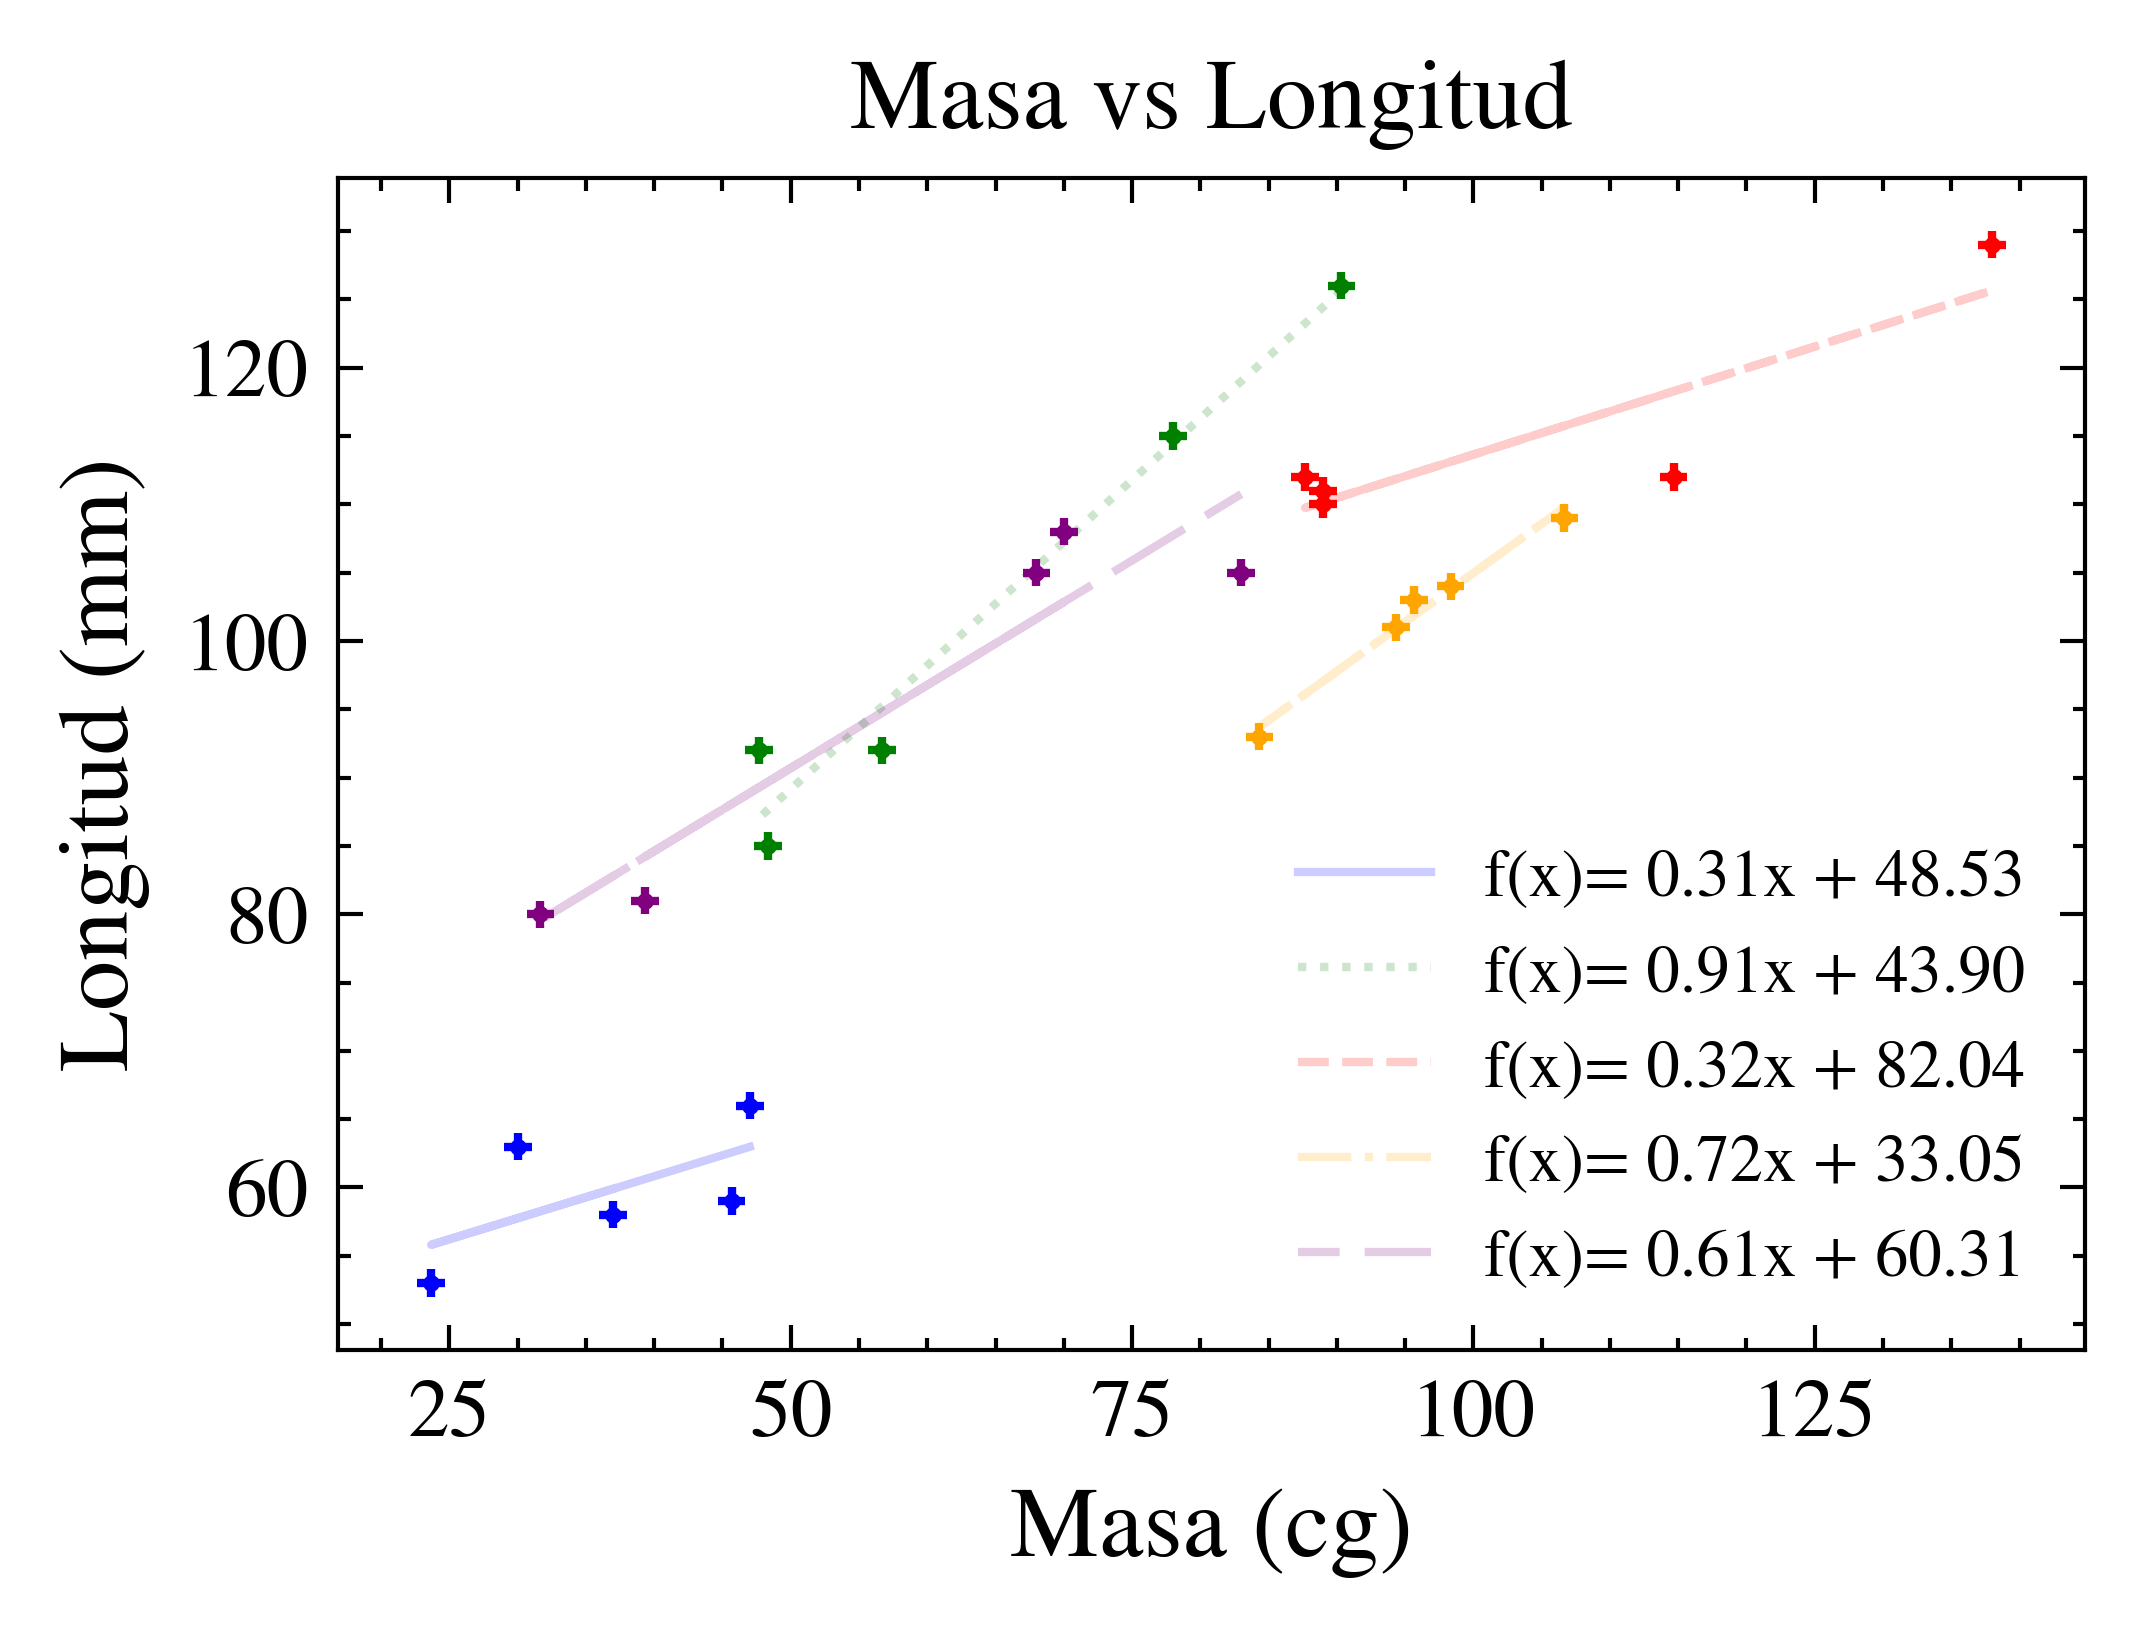

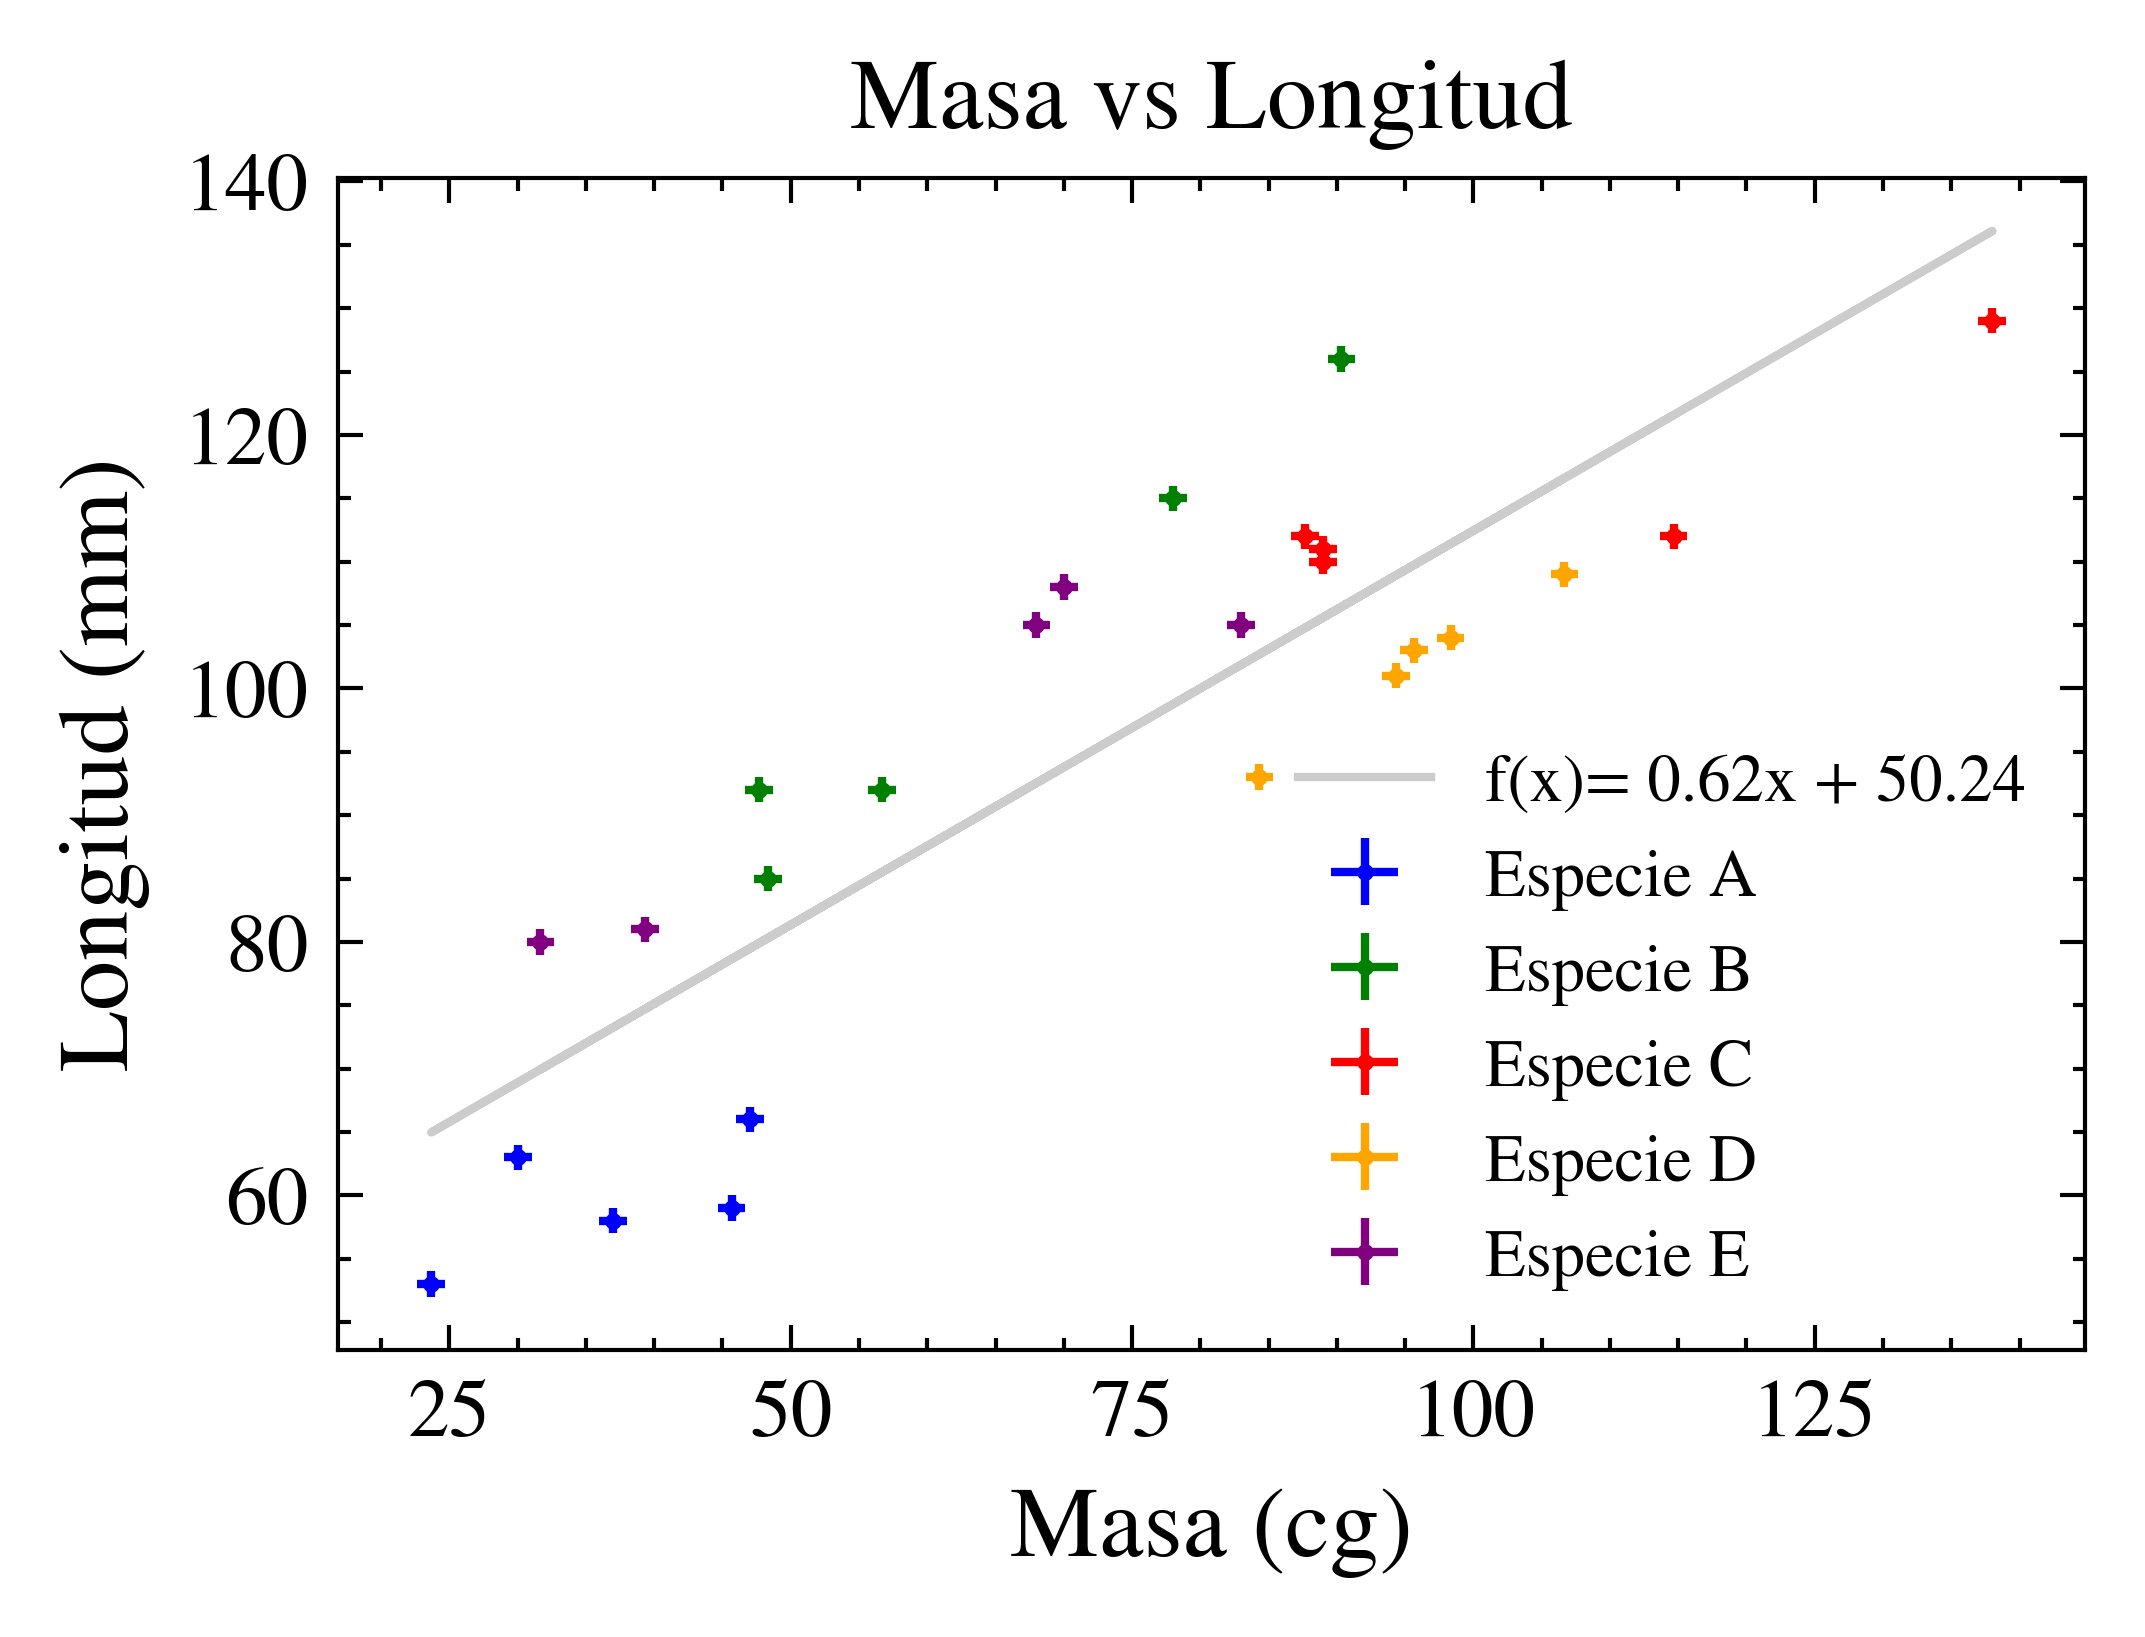

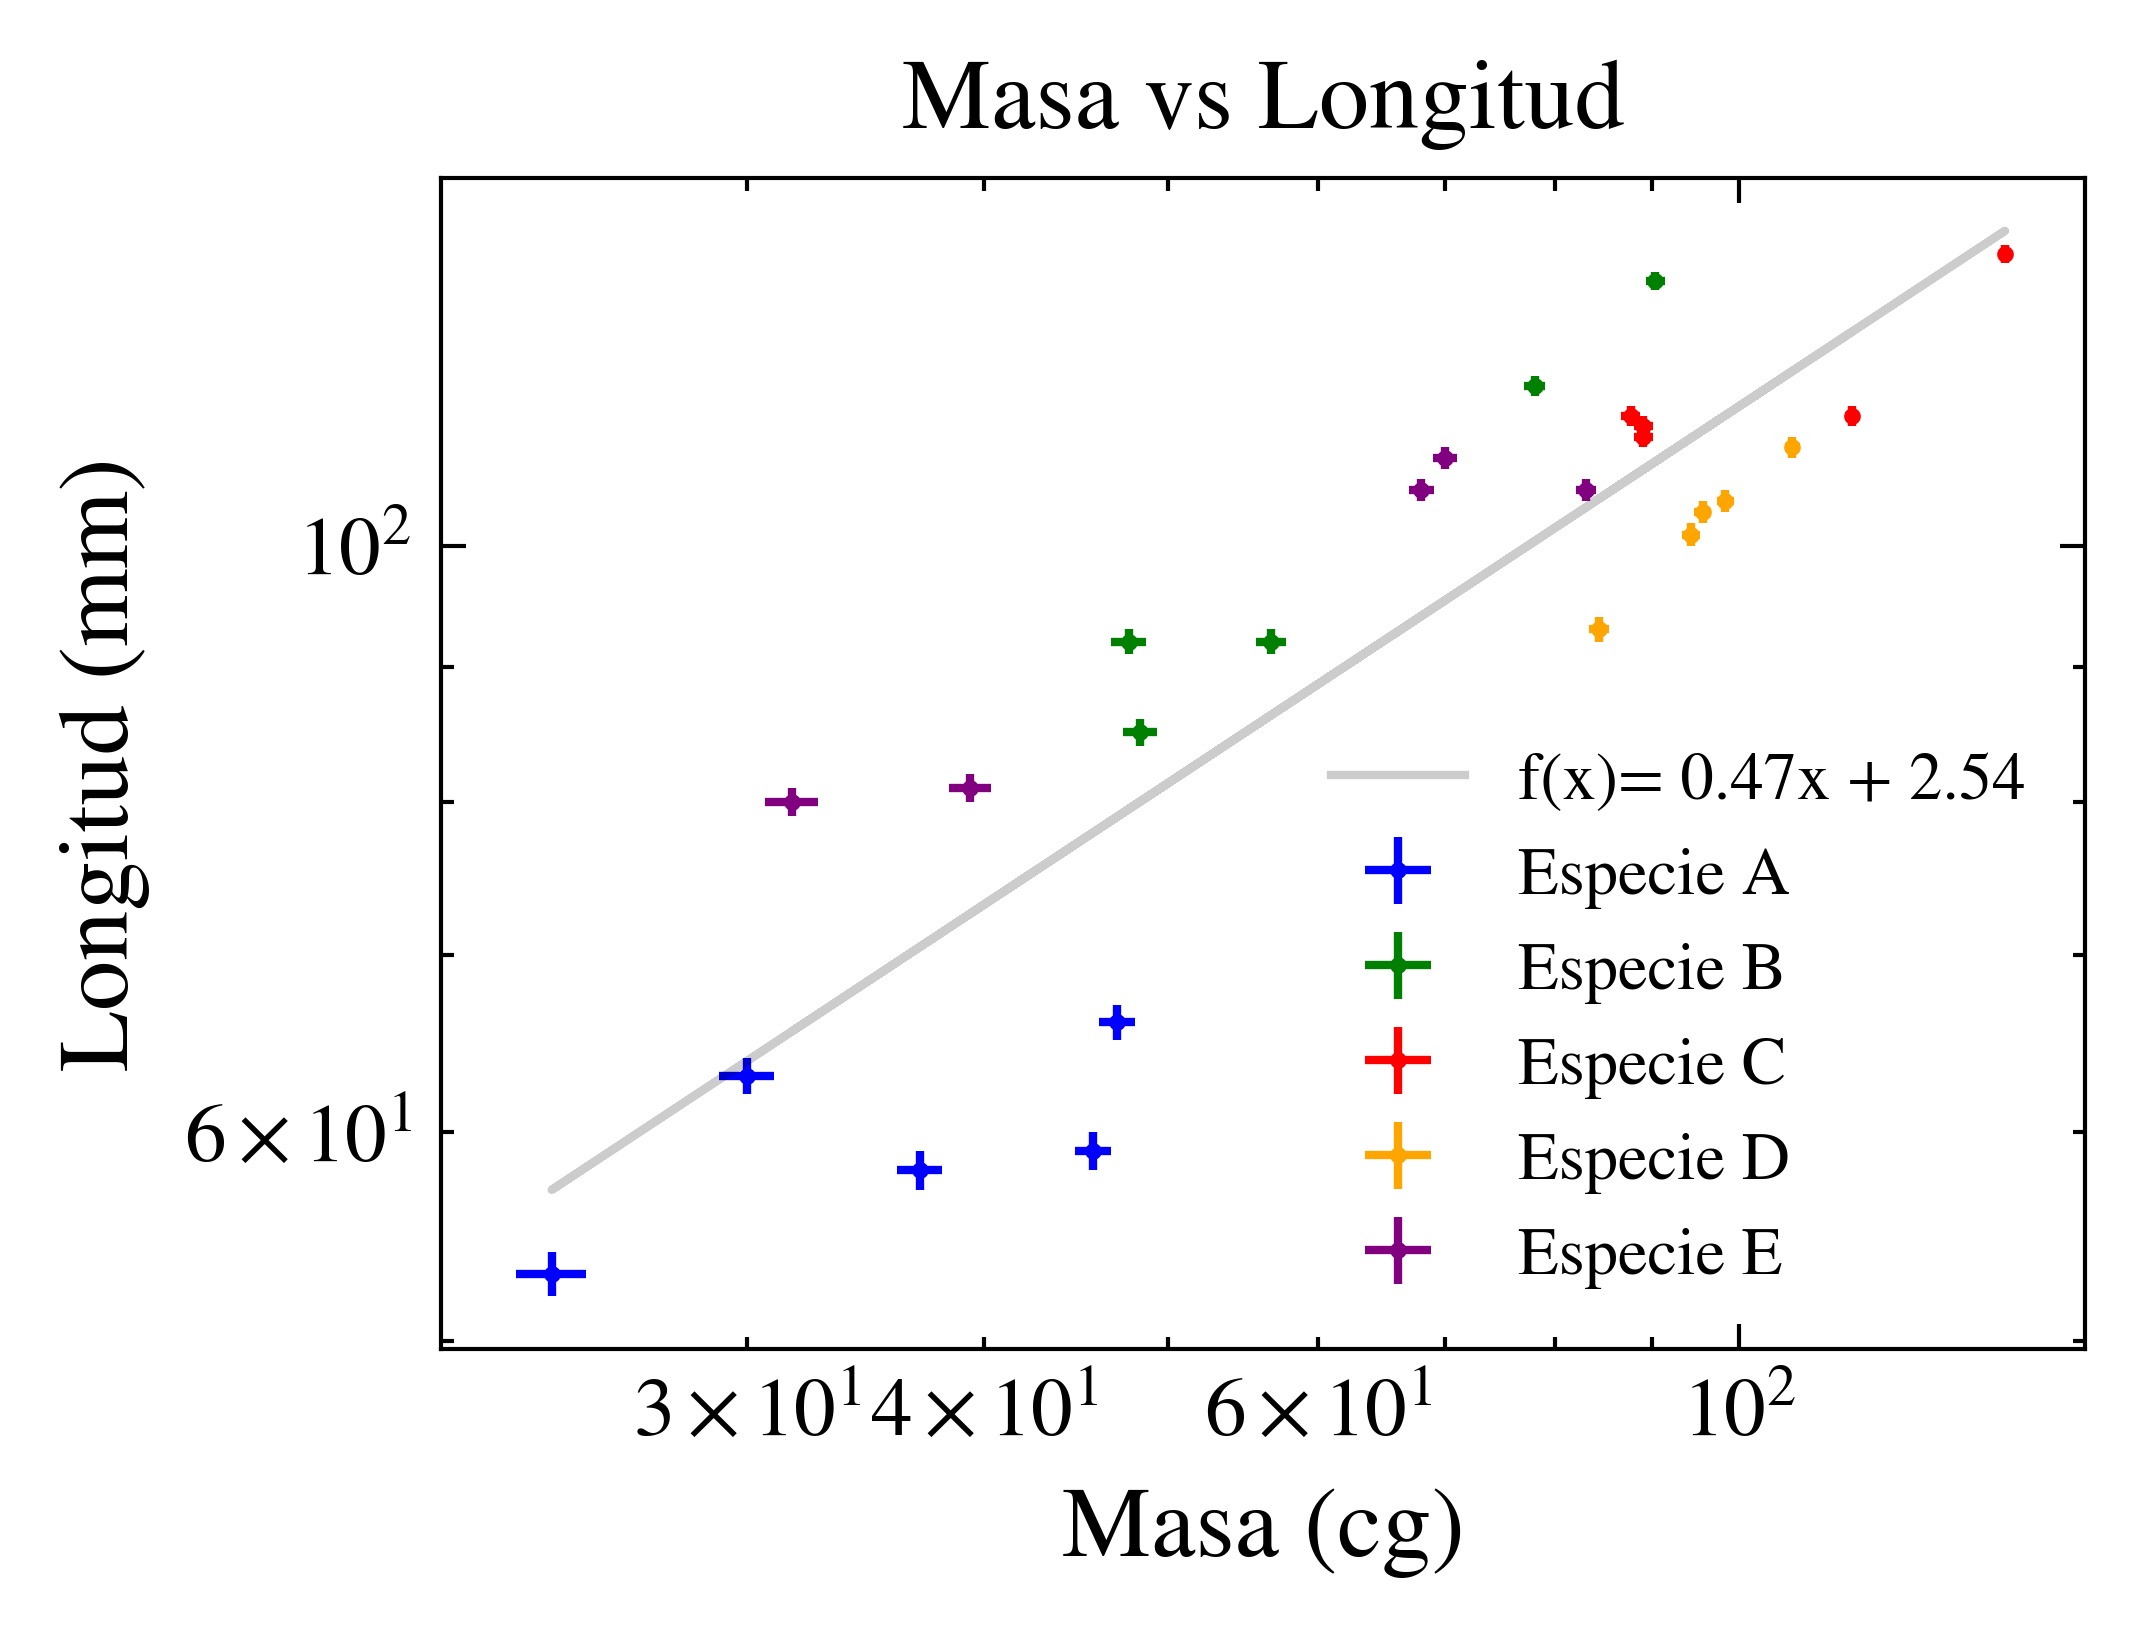

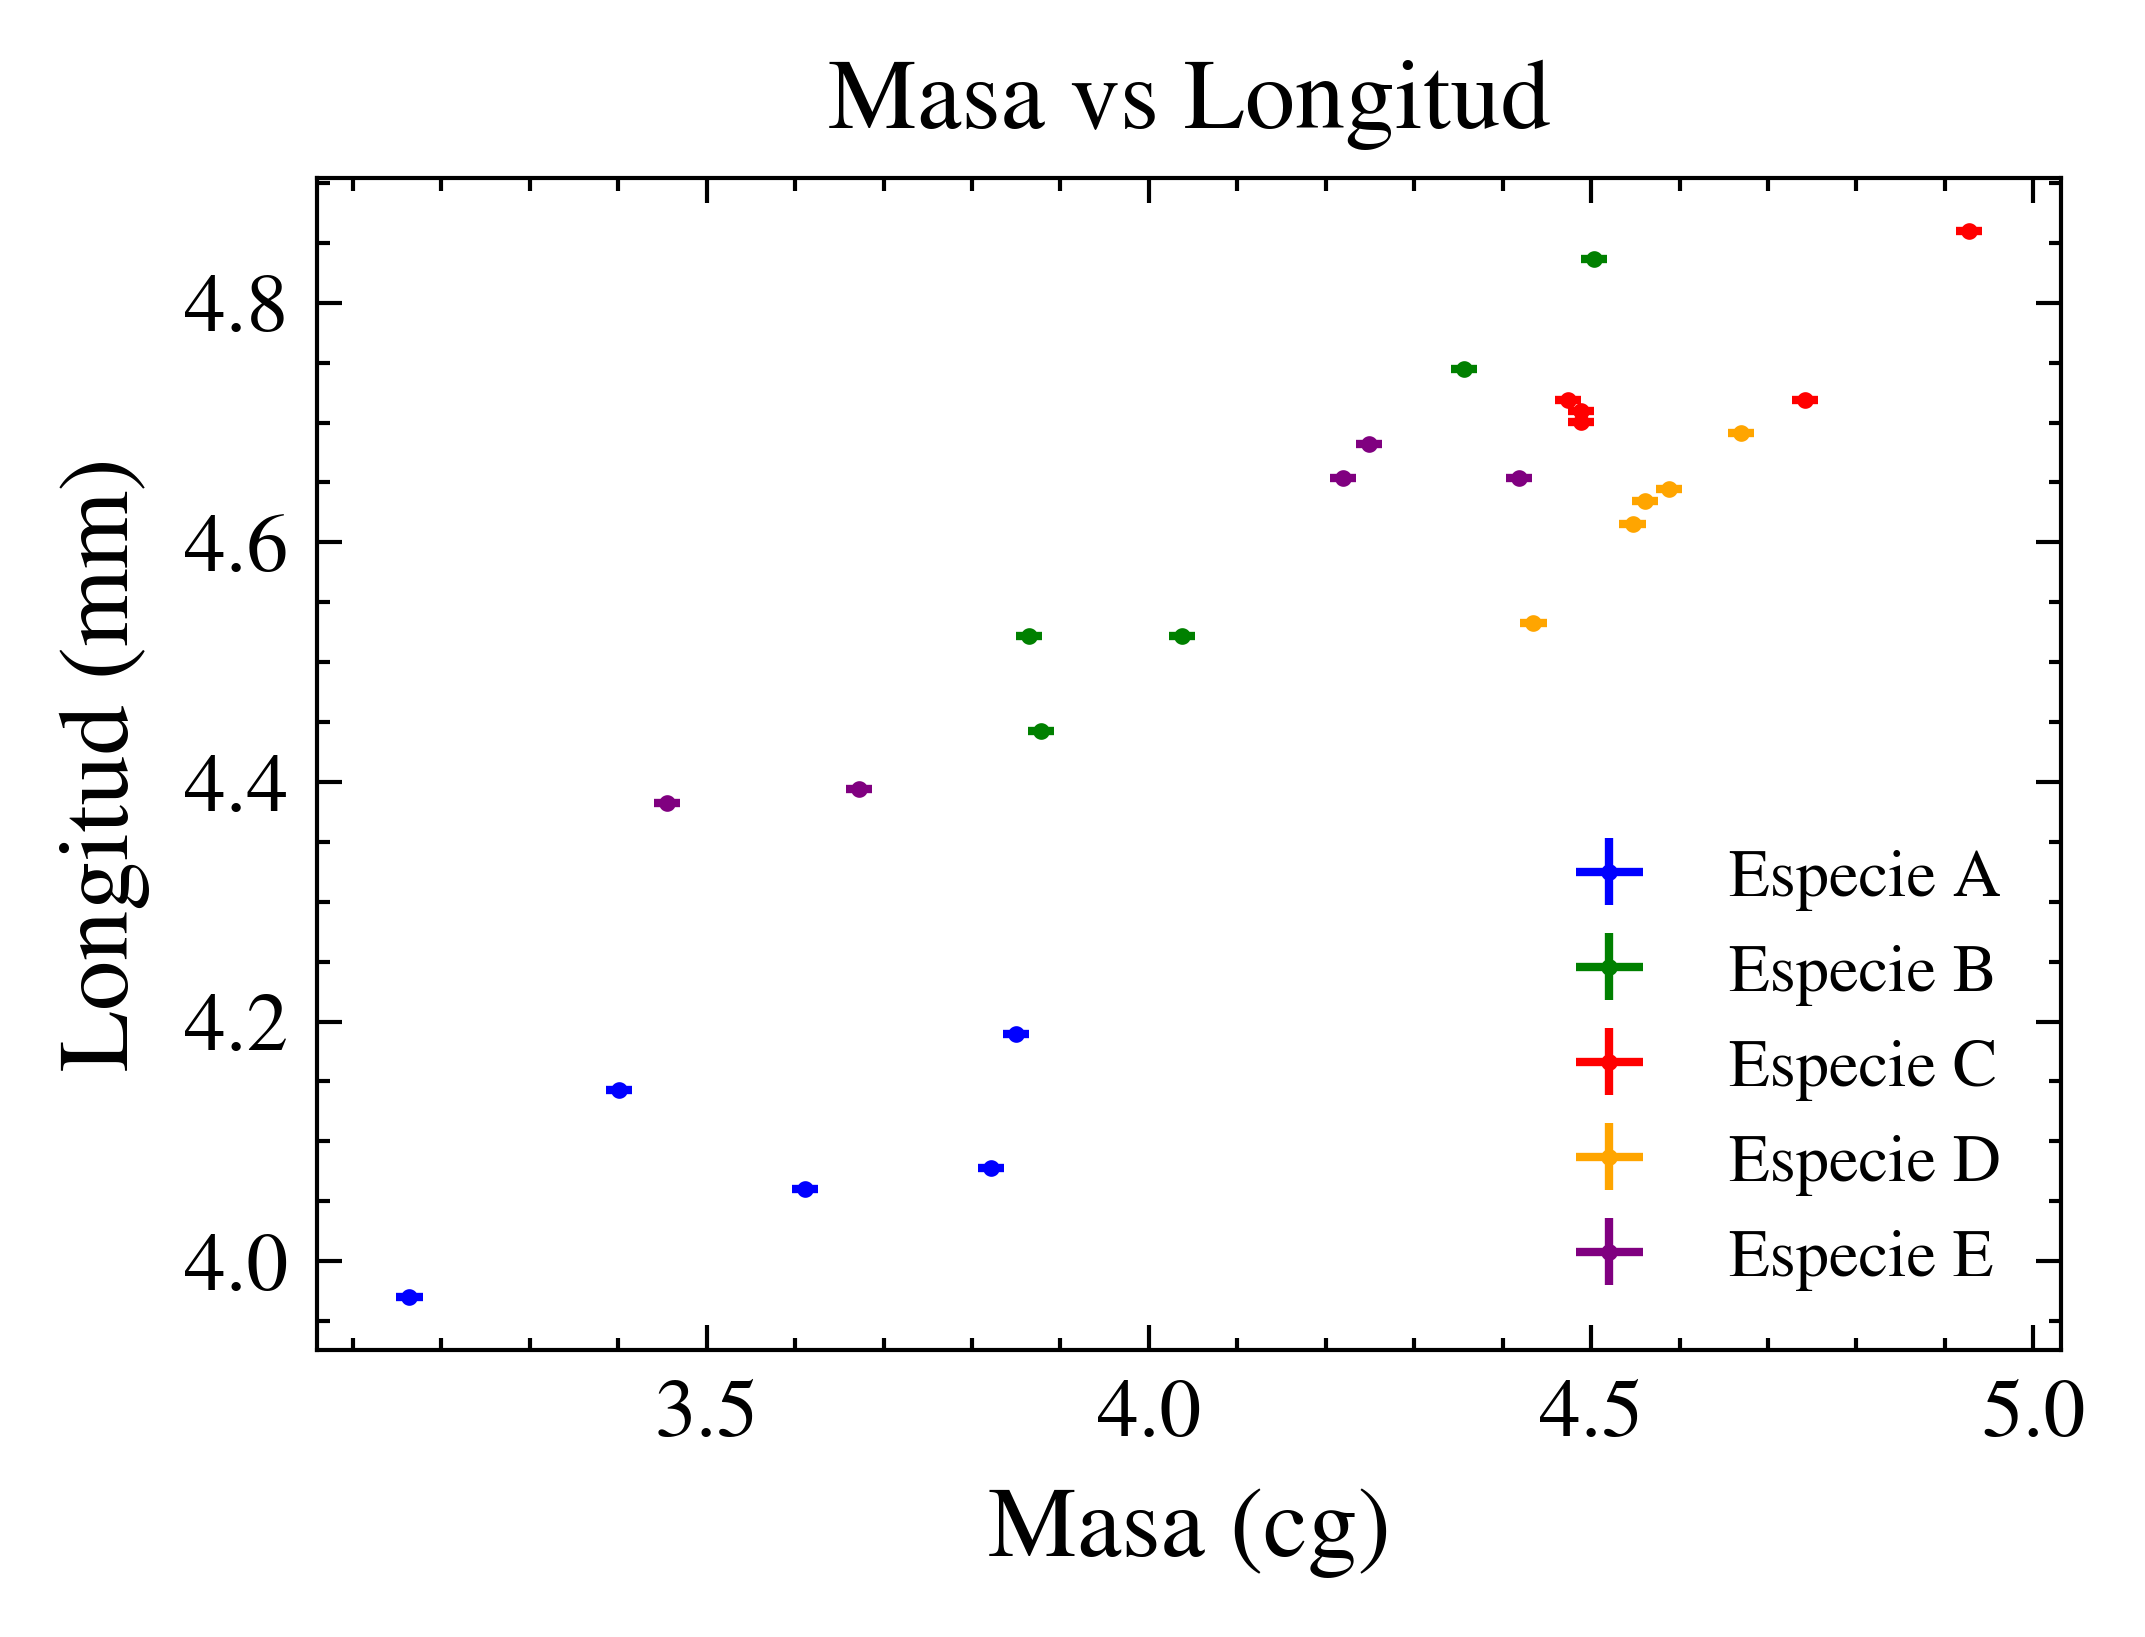

In [4]:
diameter_points = 1
tol = 1
sistematicWeightError = (3* (0.1**2))**0.5
sigmaWeightMeanError = 1

clases = [(cA, 'Especie A', 'blue'), (cB, 'Especie B','green'), (cC, 'Especie C', 'red'), (cD, 'Especie D', 'orange'), (cE, 'Especie E', 'purple')]
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['length'], xerr=massError, yerr=tol, fmt='o', ms=diameter_points, color=clase[2], alpha=1)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['length'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, alpha=0.2, label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}', color = clase[2])
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
plt.legend(fontsize=8)
plt.savefig('MvsL_mulR.pdf', format='pdf')
plt.show()

#plot only one regression
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['length'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
regression_coeffs = np.polyfit(df['weight']*100, df['length'], 1)
regression_line = np.polyval(regression_coeffs, df['weight']*100)
plt.plot(df['weight']*100, regression_line, label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
plt.legend(fontsize=8)
plt.savefig('MvsLlinearR.pdf', format='pdf')
#save as pdf
plt.show()



#regresión log log
for clase in clases:

    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight'] * 100, clase[0]['length'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)

# Calcular la regresión lineal para los datos combinados de todas las clases
combined_weights = np.concatenate([clase[0]['weight'] * 100 for clase in clases])
combined_lengths = np.concatenate([clase[0]['length'] for clase in clases])
regression_coeffs = np.polyfit(np.log(combined_weights), np.log(combined_lengths), 1)
regression_line = np.polyval(regression_coeffs, np.log(combined_weights))

# Convertir la recta ajustada de regresión a la escala original
regression_line_original = np.exp(regression_line)

plt.plot(combined_weights, regression_line_original, alpha=0.2, color='black', label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}')
plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
# Configuración de la escala logarítmica
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=8)
plt.savefig('MvsLloglogR.pdf', format='pdf')
# plt.legend()
plt.show()

def powerlaw(x, a, b):
    return a * x**b

#hacer log de los datos y luego aplicar ley de potencia
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(np.log(clase[0]['weight'] * 100), np.log(clase[0]['length']), xerr=np.log(massError), yerr=np.log(tol), fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
popt, pcov = curve_fit(powerlaw, np.log(combined_weights), np.log(combined_lengths))
# plt.plot(np.log(combined_weights), np.log(powerlaw(combined_weights, *popt)), alpha=0.2, color='black', label=f'f(x)= {popt[0]:.2f}x + {popt[1]:.2f}')

plt.xlabel('Masa (cg)')
plt.ylabel('Longitud (mm)')
plt.title('Masa vs Longitud')
plt.legend(fontsize=8)
plt.savefig('MvsLlogR.pdf', format='pdf')
plt.show()


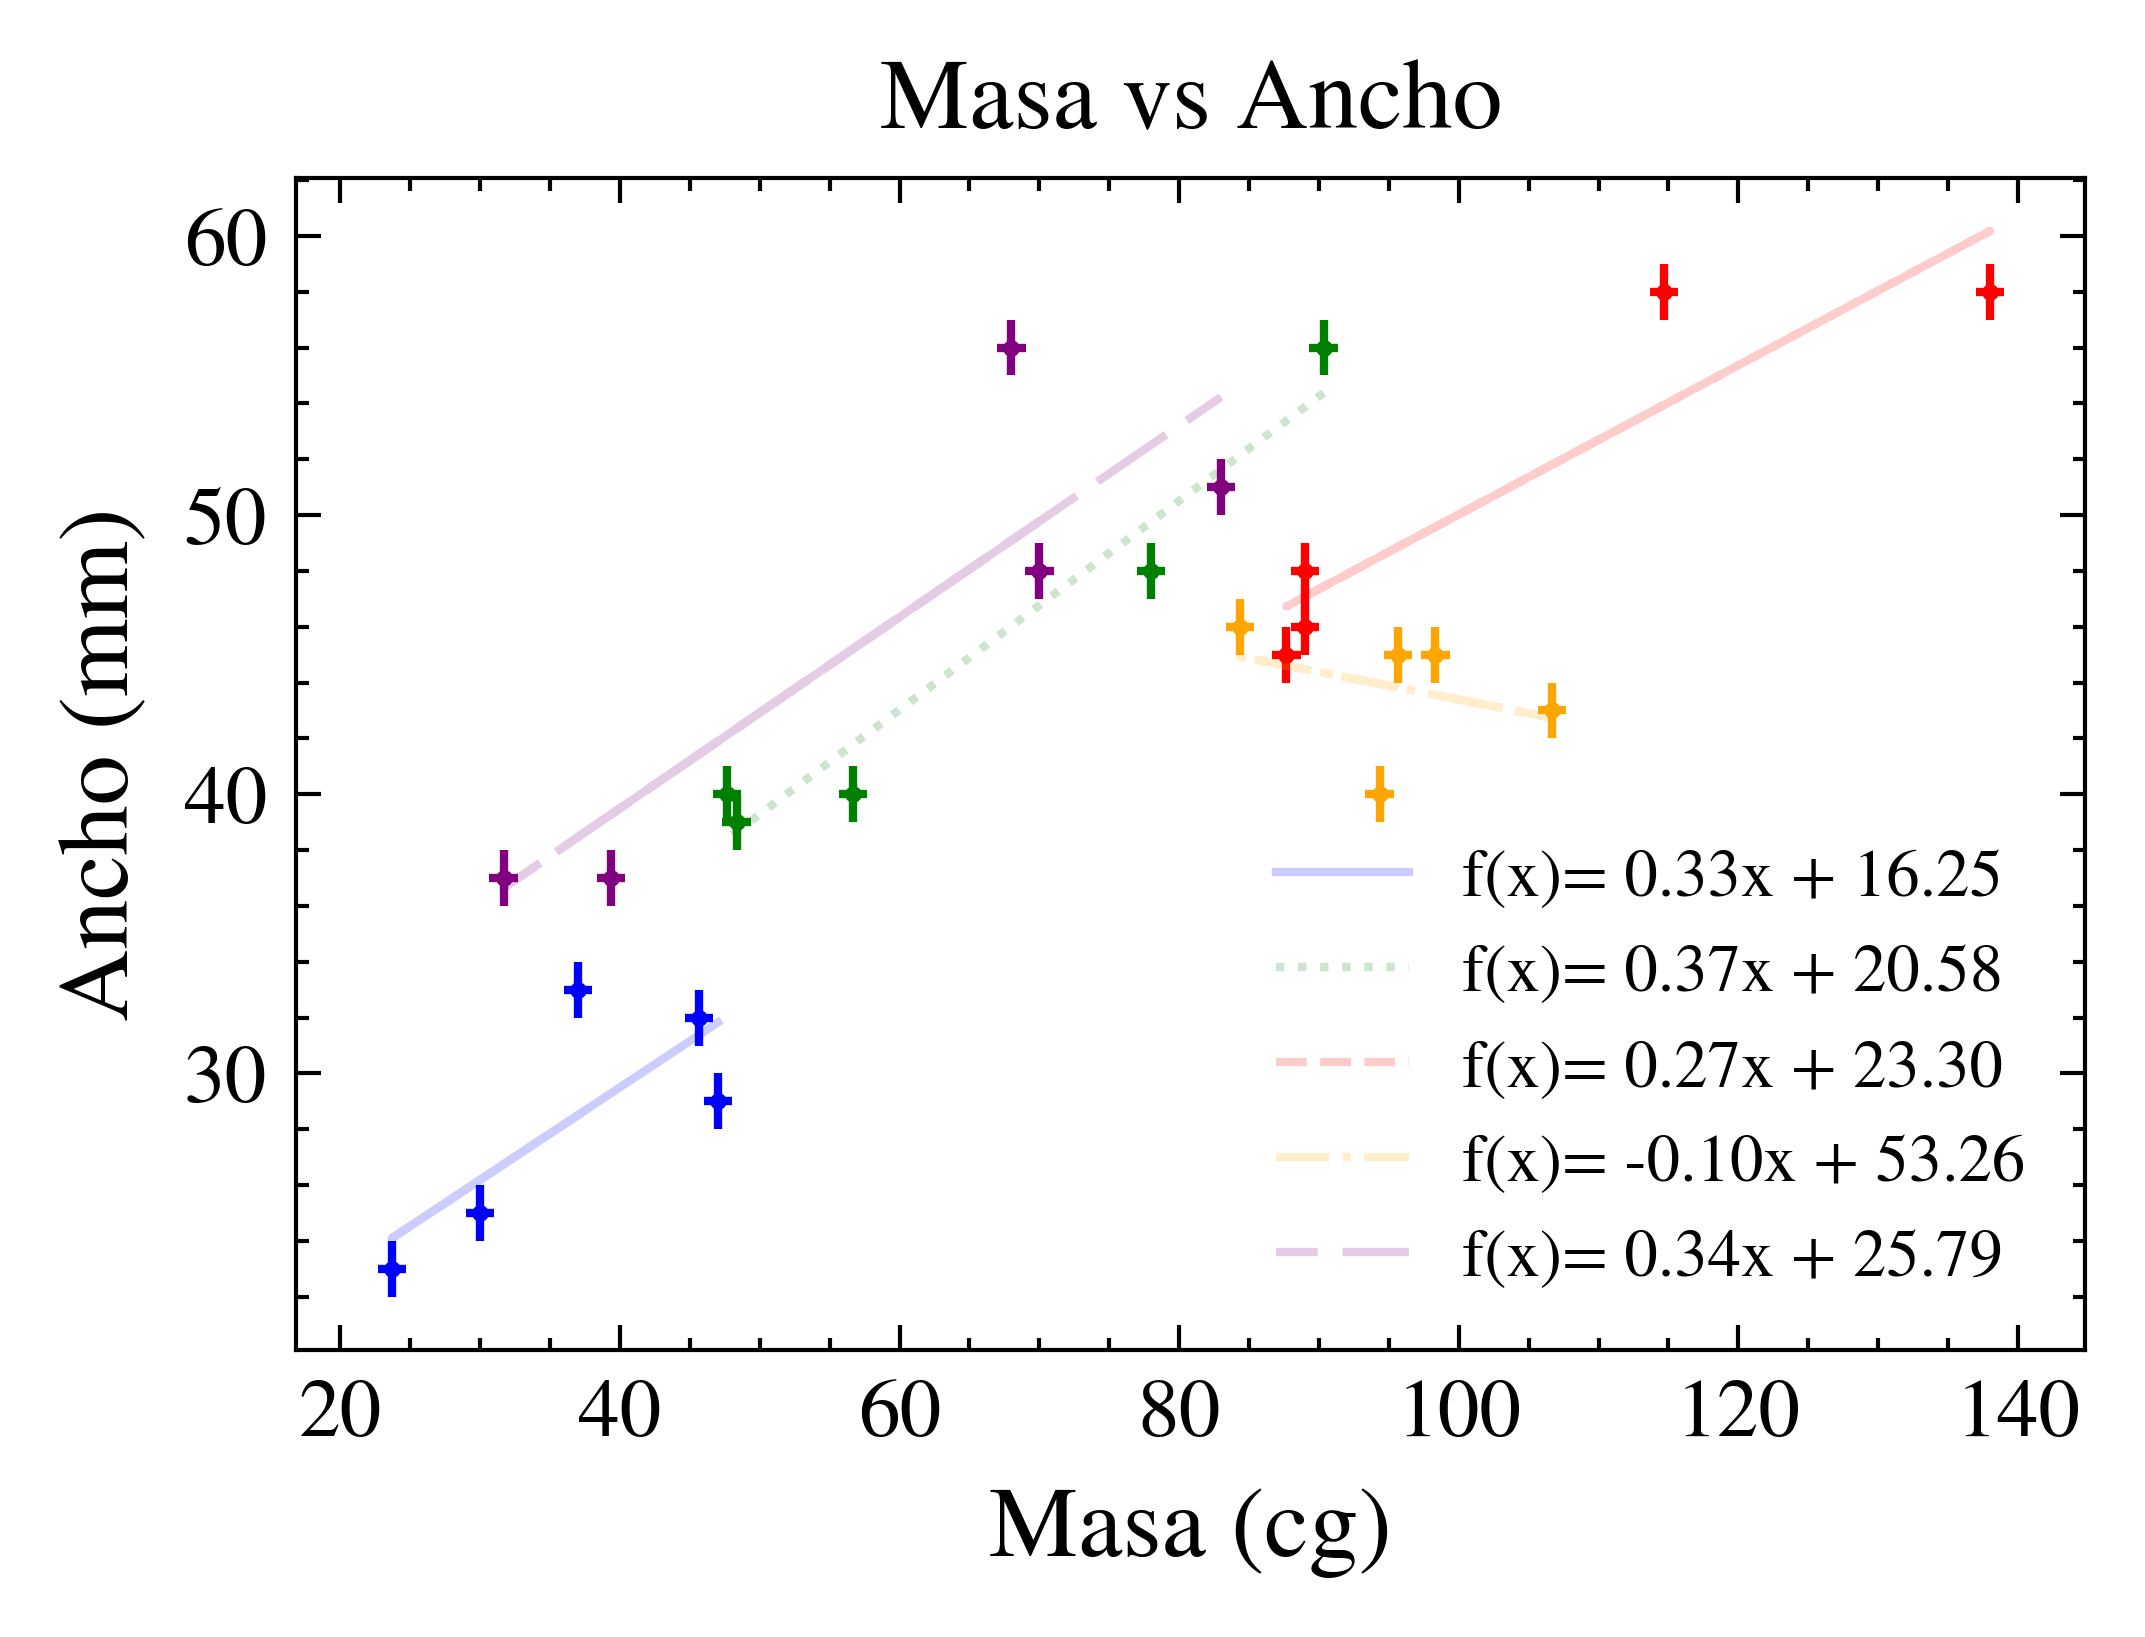

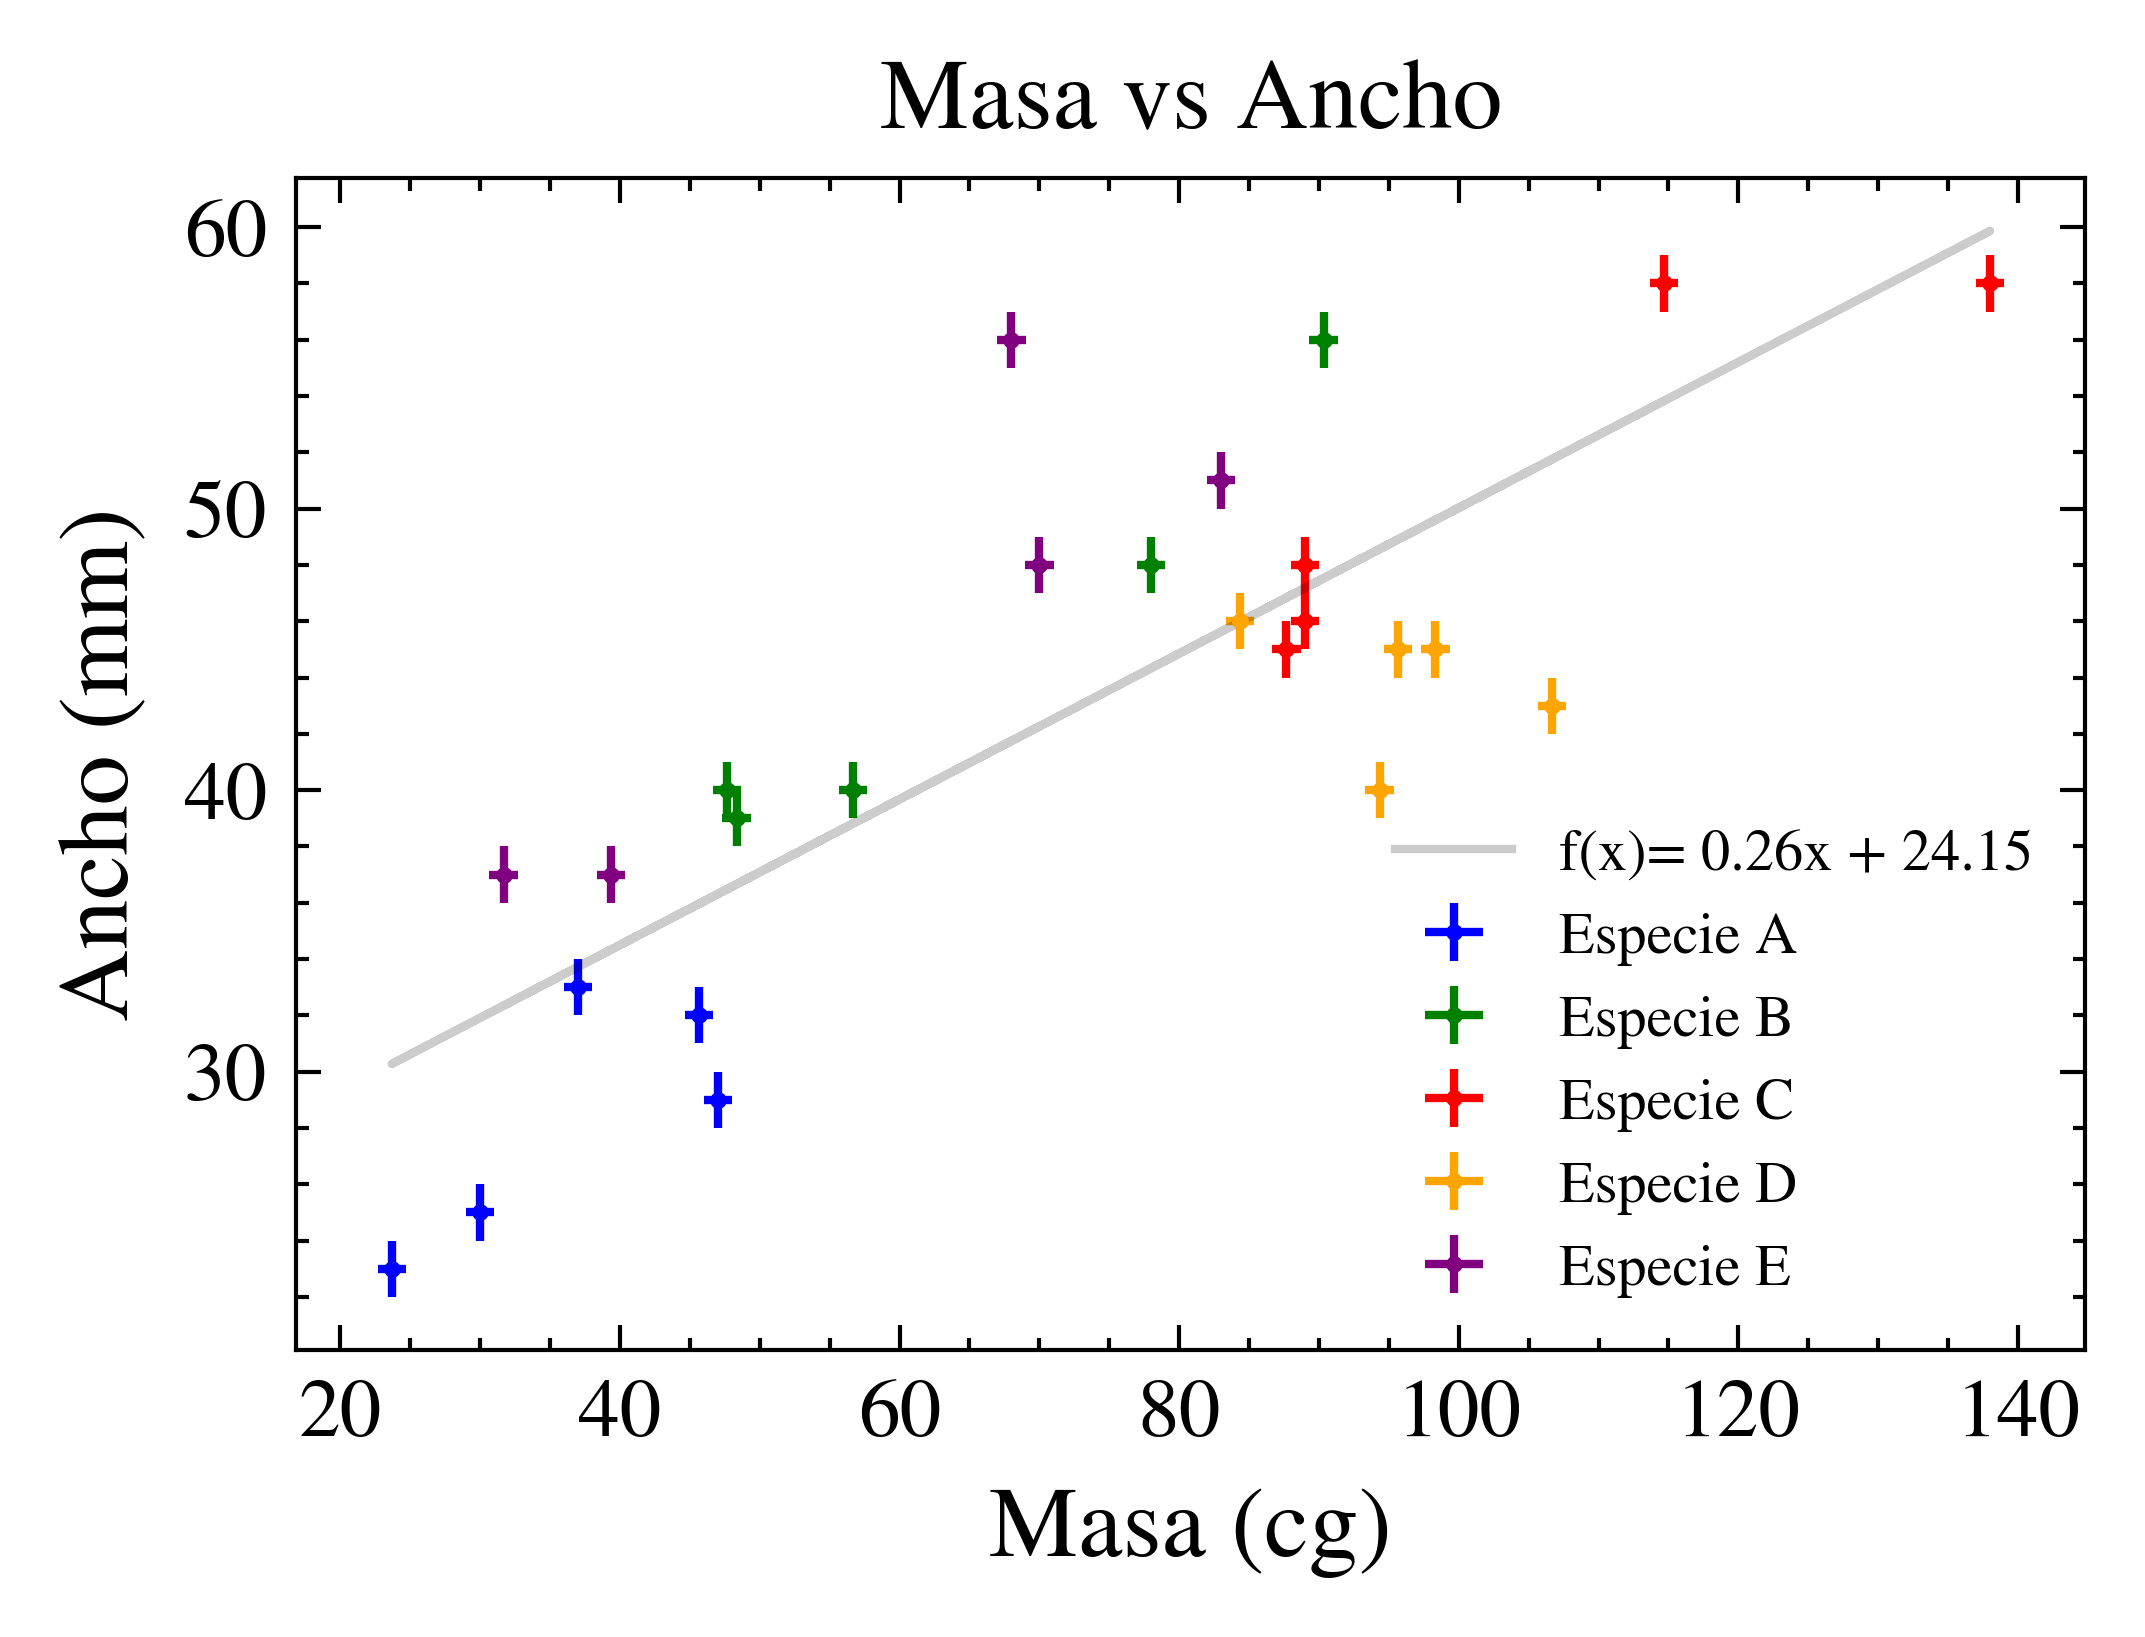

In [5]:
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['width'], xerr=massError, yerr=tol, fmt='o', ms=diameter_points, color=clase[2], alpha=1)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['width'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}', alpha=0.2, color = clase[2])
plt.xlabel('Masa (cg)')
plt.ylabel('Ancho (mm)')
plt.title('Masa vs Ancho')
plt.legend(fontsize=8)
plt.savefig('MvsW_mulR.pdf', format='pdf')
plt.show()

#plot only one regression
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['width'], xerr=massError, yerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
regression_coeffs = np.polyfit(df['weight']*100, df['width'], 1)
regression_line = np.polyval(regression_coeffs, df['weight']*100)
plt.plot(df['weight']*100, regression_line, label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}', alpha=0.2, color='black')
plt.xlabel('Masa (cg)')
plt.ylabel('Ancho (mm)')
plt.title('Masa vs Ancho')
plt.legend(fontsize=7)
plt.savefig('MvsWlinearR.pdf', format='pdf')
plt.show()

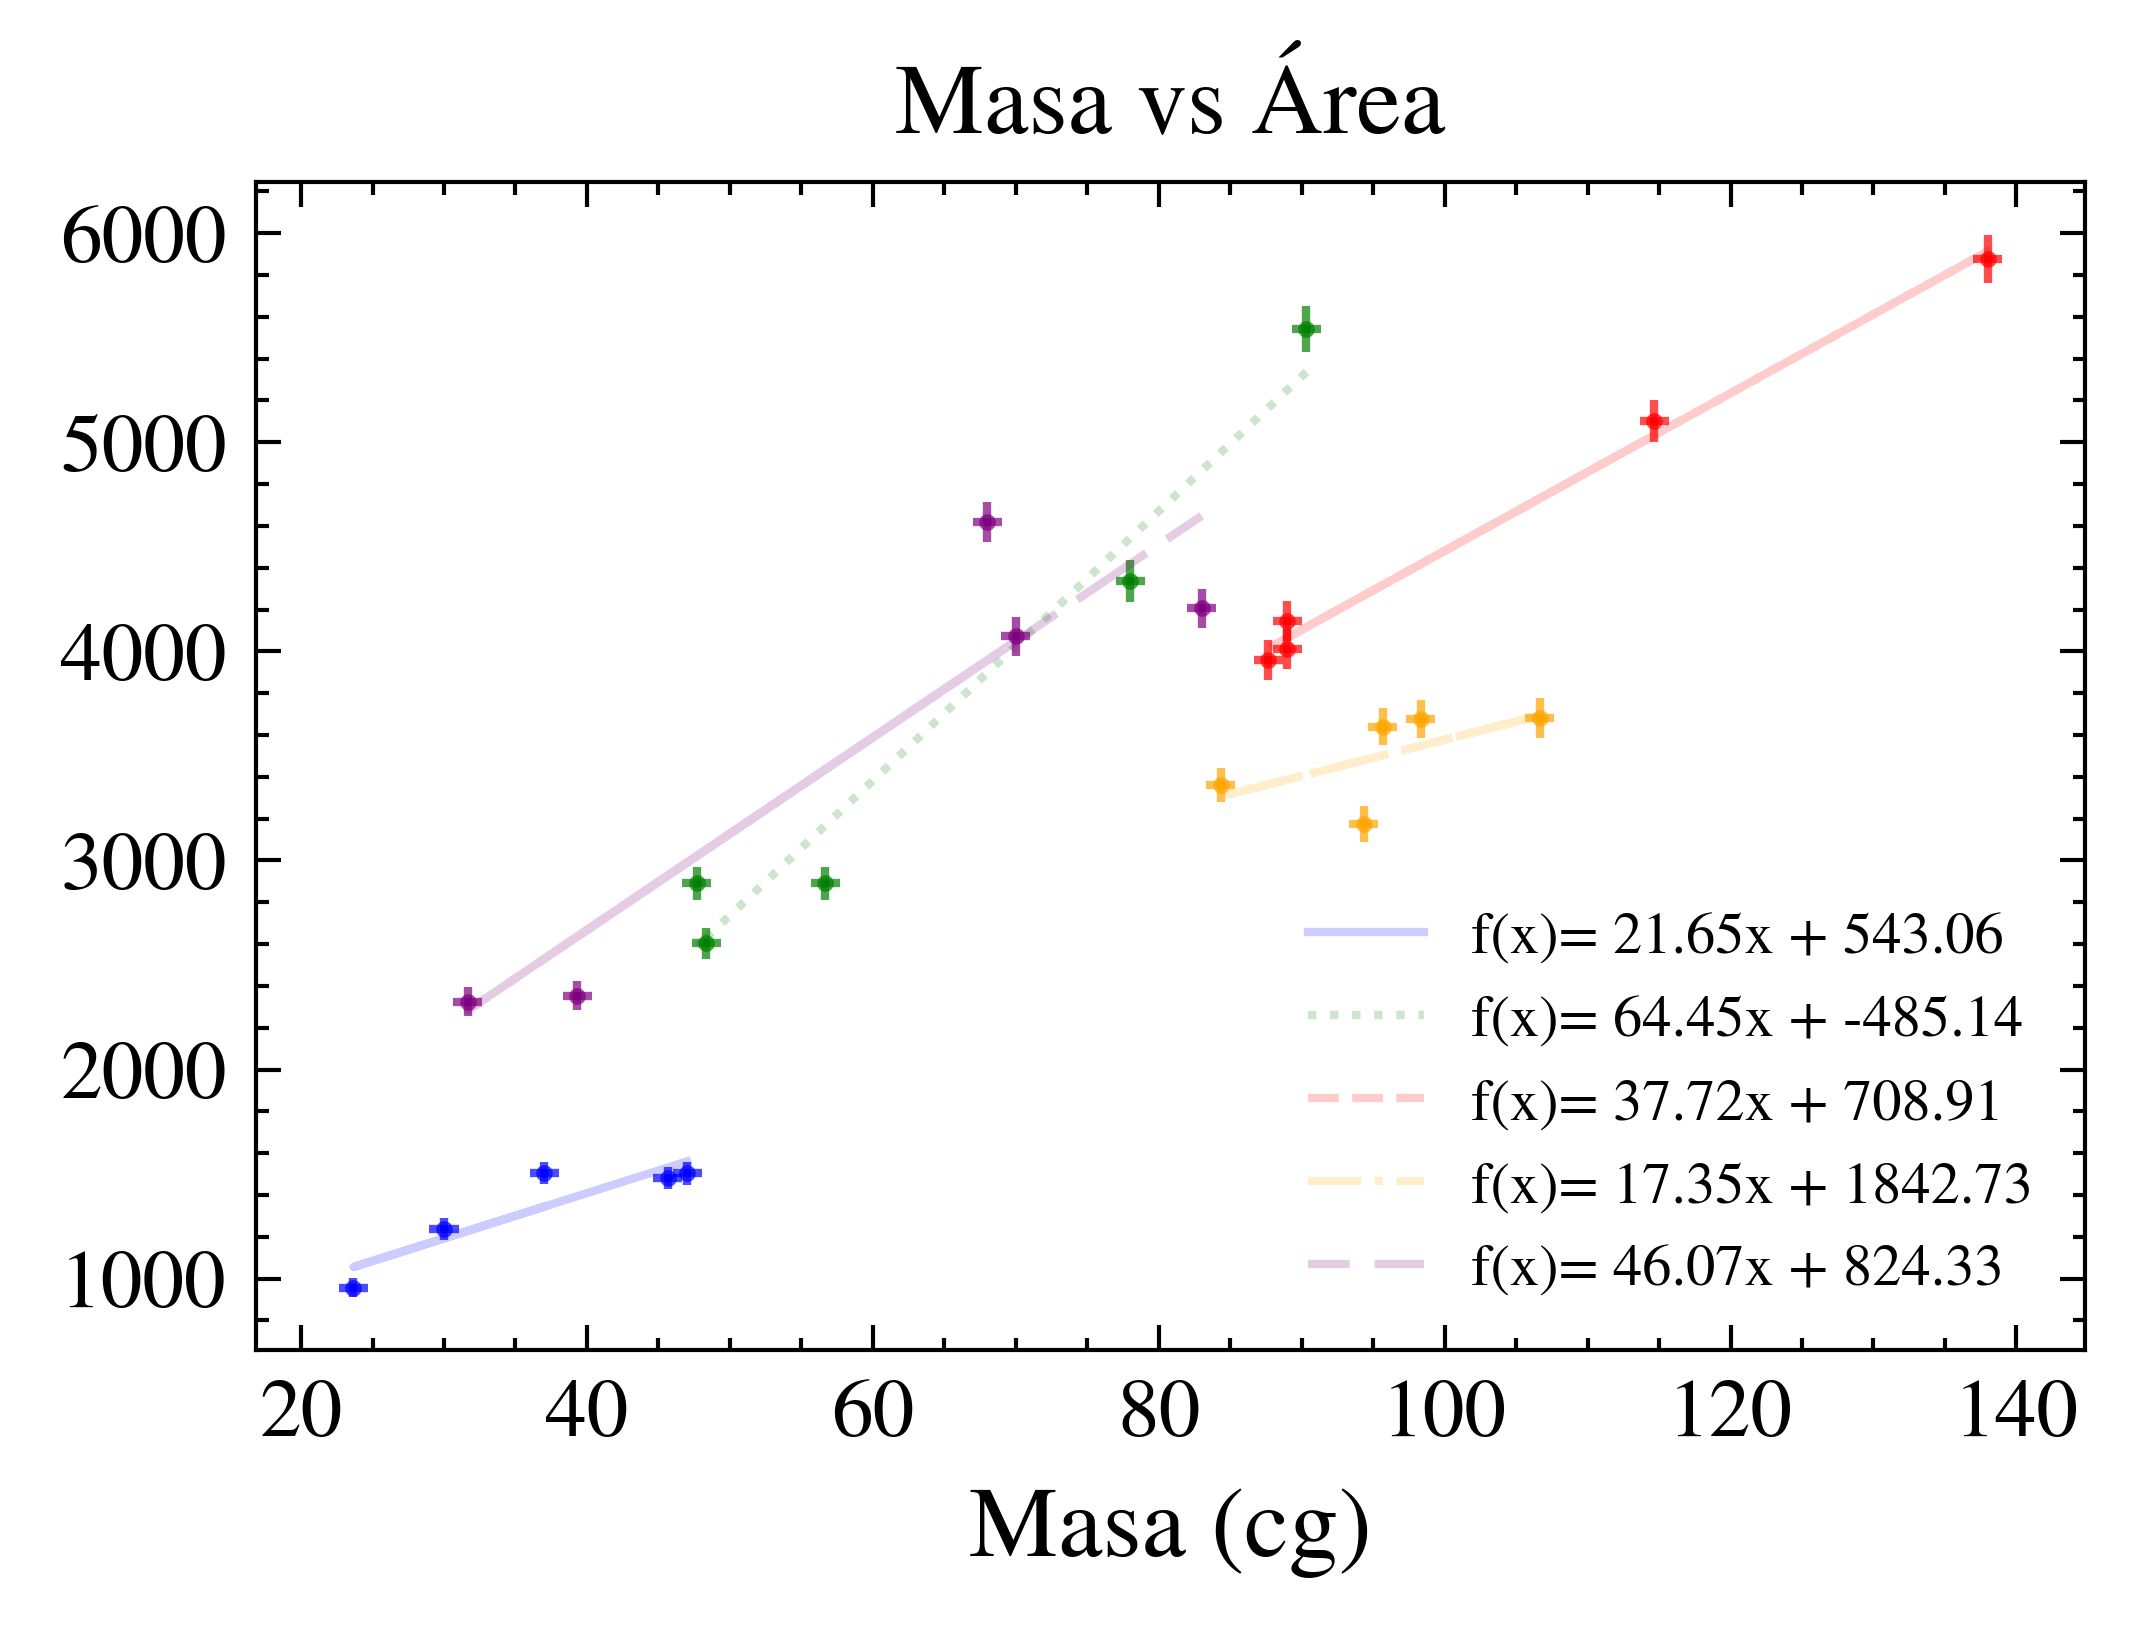

In [42]:
tol = 1 #Absolut error of each sample (width and lenght) (mm)

for clase in clases:
    sigmaArea = [((1/4 * b0 * np.pi)**2 * tol**2 +  (1/4 * a0 * np.pi)**2 * tol**2)**0.5 for a0, b0 in zip(clase[0]['width'], clase[0]['length'])]
    tol = ((sistematicWeightError)**2 + sigmaWeightMeanError**2)**0.5
    plt.errorbar(clase[0]['weight']*100, clase[0]['area'], yerr=sigmaArea, xerr=tol, fmt='o', ms=diameter_points, color=clase[2], alpha=0.7)
    regression_coeffs = np.polyfit(clase[0]['weight']*100, clase[0]['area'], 1)
    regression_line = np.polyval(regression_coeffs, clase[0]['weight']*100)
    plt.plot(clase[0]['weight']*100, regression_line, label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}', alpha=0.2, color = clase[2])
plt.xlabel('Masa (cg)')
plt.title('Masa vs Área')
plt.legend(fontsize=7)
plt.savefig('MvsA_mulR.pdf', format='pdf')
plt.show()

# #plot only one regression
# for clase in clases:
#     plt.errorbar(clase[0]['weight']*100, clase[0]['area'], yerr=sigmaArea, xerr=tol, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=0.7)
# regression_coeffs = np.polyfit(df['weight']*100, df['area'], 1)
# regression_line = np.polyval(regression_coeffs, df['weight']*100)
# plt.plot(df['weight']*100, regression_line, label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}', alpha=0.2, color='black')
# plt.xlabel('Masa (cg)')
# plt.title('Masa vs Área')
# plt.legend(fontsize=7)
# plt.savefig('MvsAlinearR.pdf', format='pdf')
# plt.show()


#regresión log log
# for clase in clases:
#     massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
#     plt.errorbar(np.log(clase[0]['weight'] * 100), np.log(clase[0]['area']), xerr=np.log(massError), yerr=np.log(tol), fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=1)
# combined_weights = np.concatenate([clase[0]['weight'] * 100 for clase in clases])
# combined_areas = np.concatenate([clase[0]['area'] for clase in clases])
# popt, pcov = curve_fit(linear, combined_weights, combined_areas)

# plt.xlabel('Masa (cg)')

# regression_line_original = np.exp(regression_line)

# plt.plot(combined_weights, regression_line_original, label=f'f(x)= {regression_coeffs[0]:.2f}x + {regression_coeffs[1]:.2f}', alpha=0.2, color='black')
# plt.legend(fontsize=7)
# plt.xlabel('Masa (cg)', fontsize=14)
# plt.ylabel('Longitud (mm)')
# plt.title('Masa vs Área')
# plt.xscale('log')
# plt.yscale('log')
# plt.savefig('MvsAloglogR.pdf', format='pdf')
# plt.show()



$$\sigma_A = \bigg[ \bigg( \frac{dA}{da} \Bigg|_{a_0,\space b_0} \sigma_a \bigg)^2 + \bigg( \frac{dA}{db} \Bigg|_{a_0, \space b_0} \sigma_b \bigg)^2 \bigg]^{\frac{1}{2}}
$$
$$ \sigma_A = \bigg[ \bigg( \frac{1}{4} b_0 \pi \bigg)^2\sigma_b + \bigg( \frac{1}{4} a_0 \pi \bigg)^2\sigma_a \bigg]^{\frac{1}{2}}

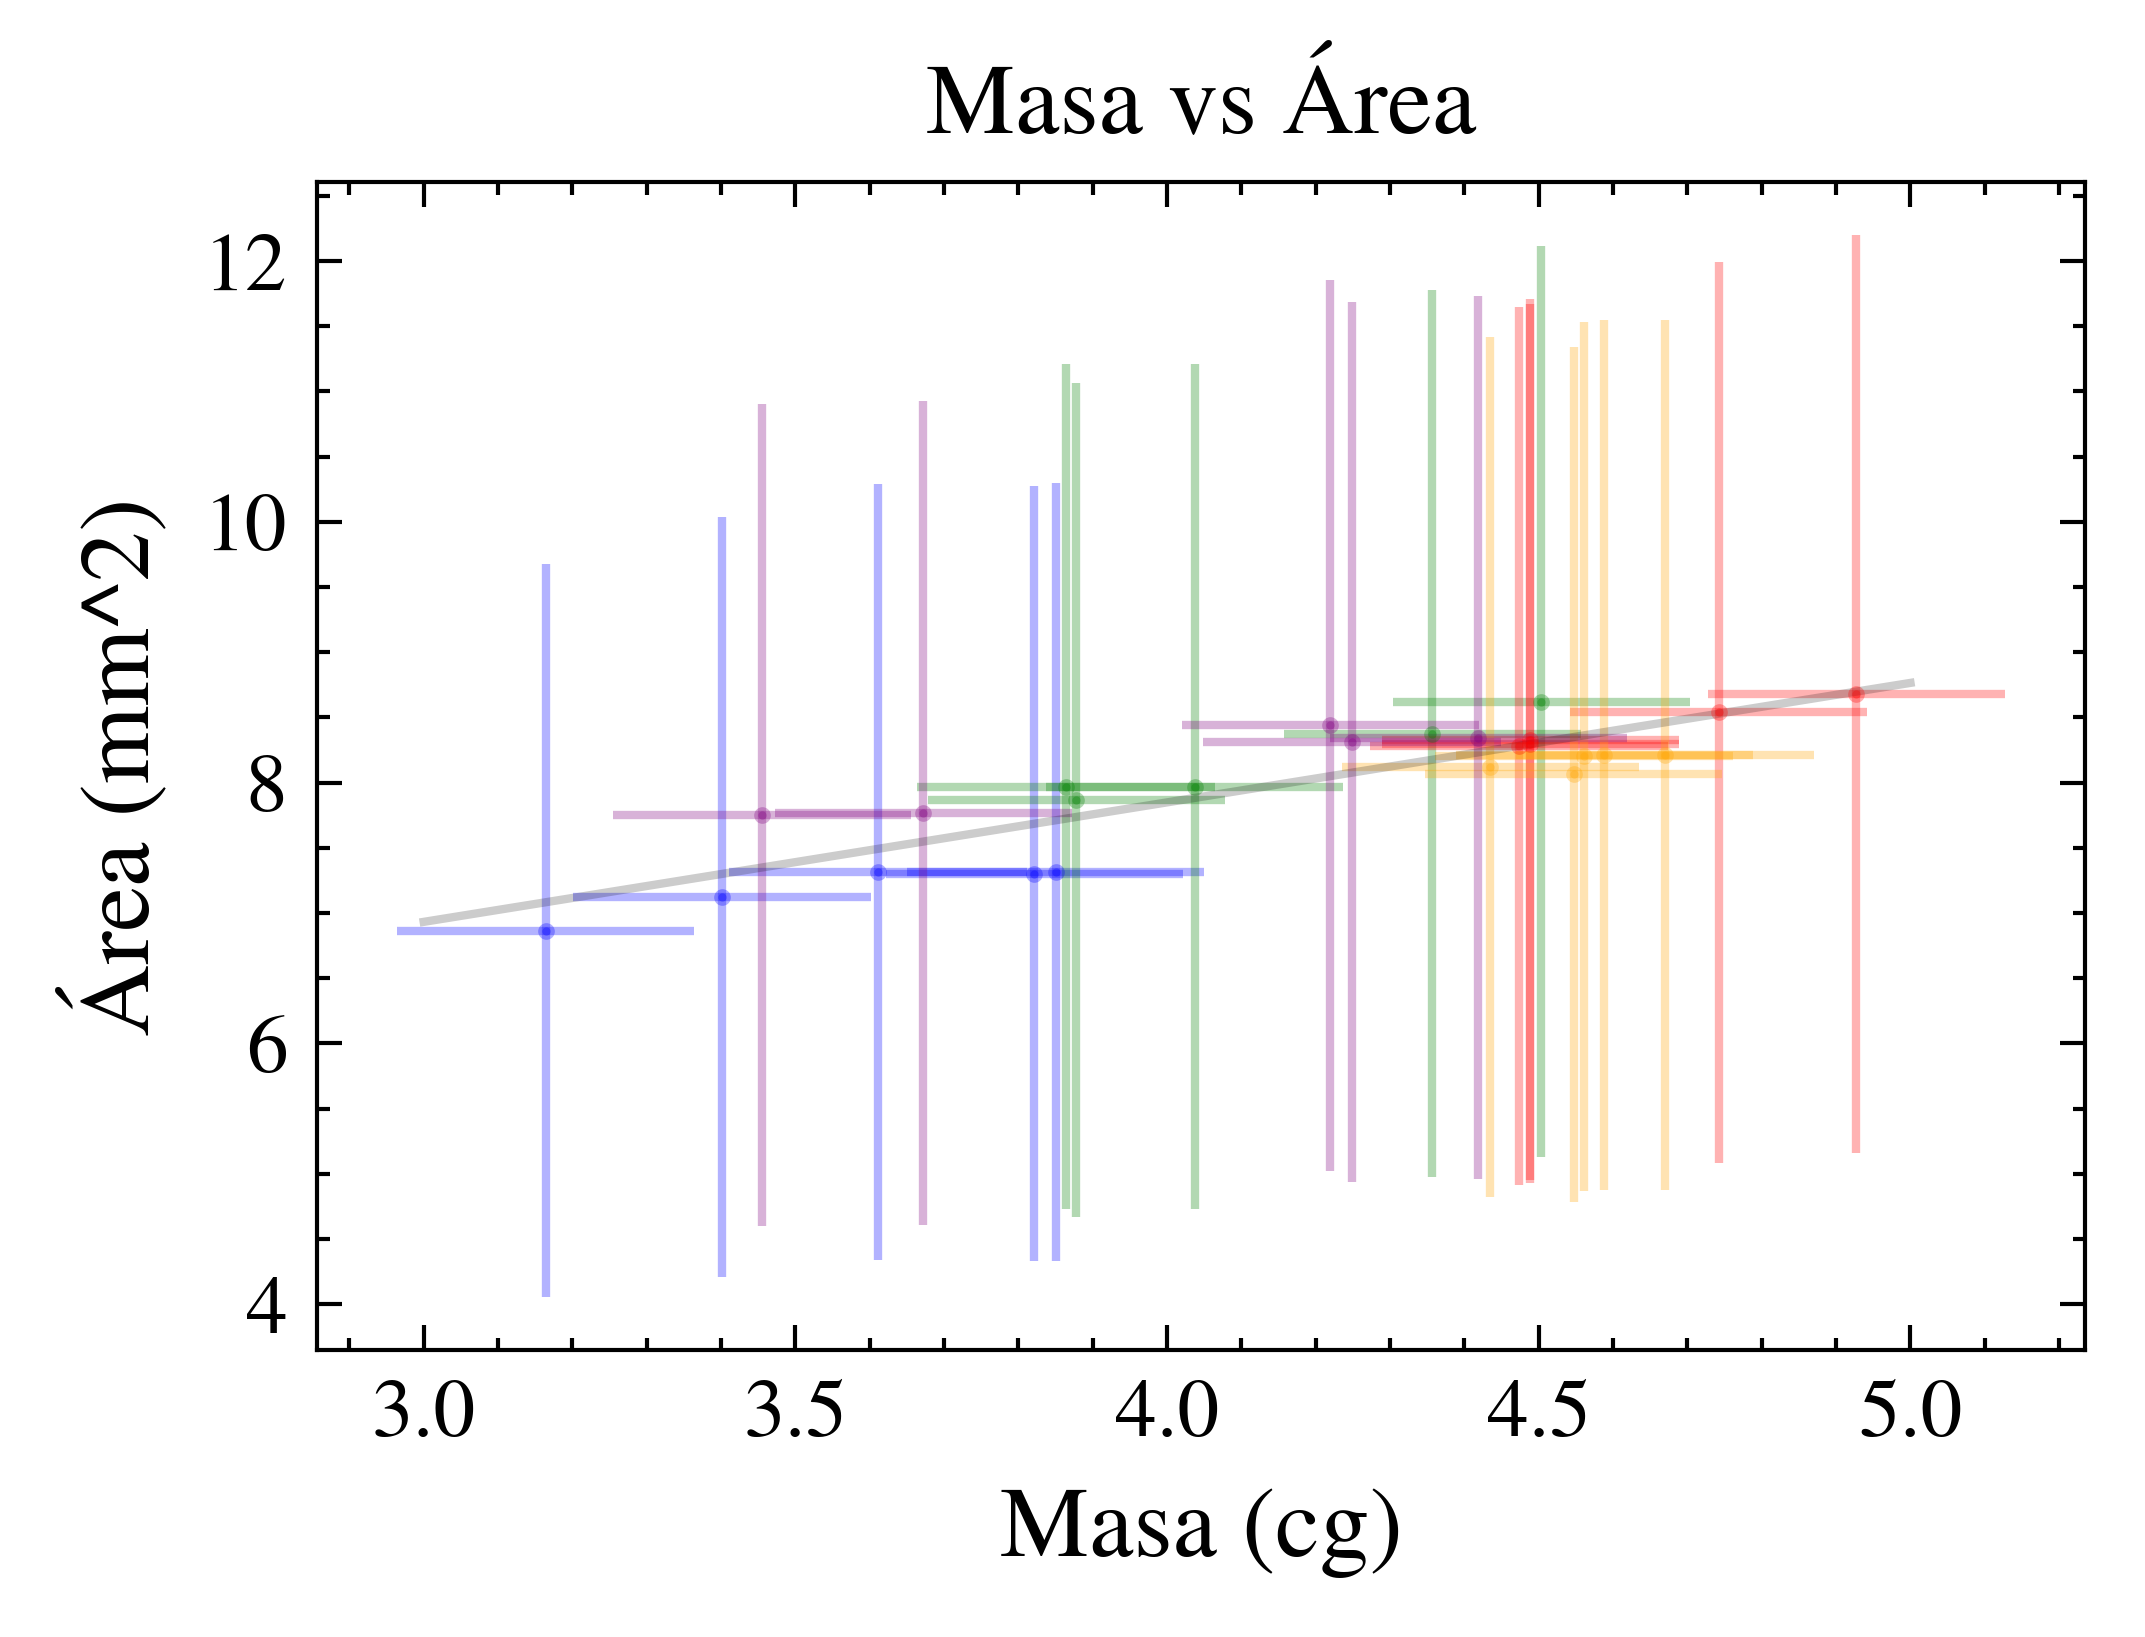

[40.036051750446354, 37.2753973096312, 37.64179966249477, 32.086182525950846, 37.05964297506239]
[76.5753140039087, 69.2064589526595, 55.713468606276905, 55.713468606276905, 51.93733005144503]
[66.72880720182978, 78.54963320327167, 66.65249943580771, 67.03316961574669, 70.04589272677983]
[62.42309818973335, 60.330133830775104, 57.621147207895525, 65.07439694951005, 62.93240175835211]
[64.82747044300635, 48.95053517074125, 65.63598343192173, 49.45514473383893, 66.0878837051057]


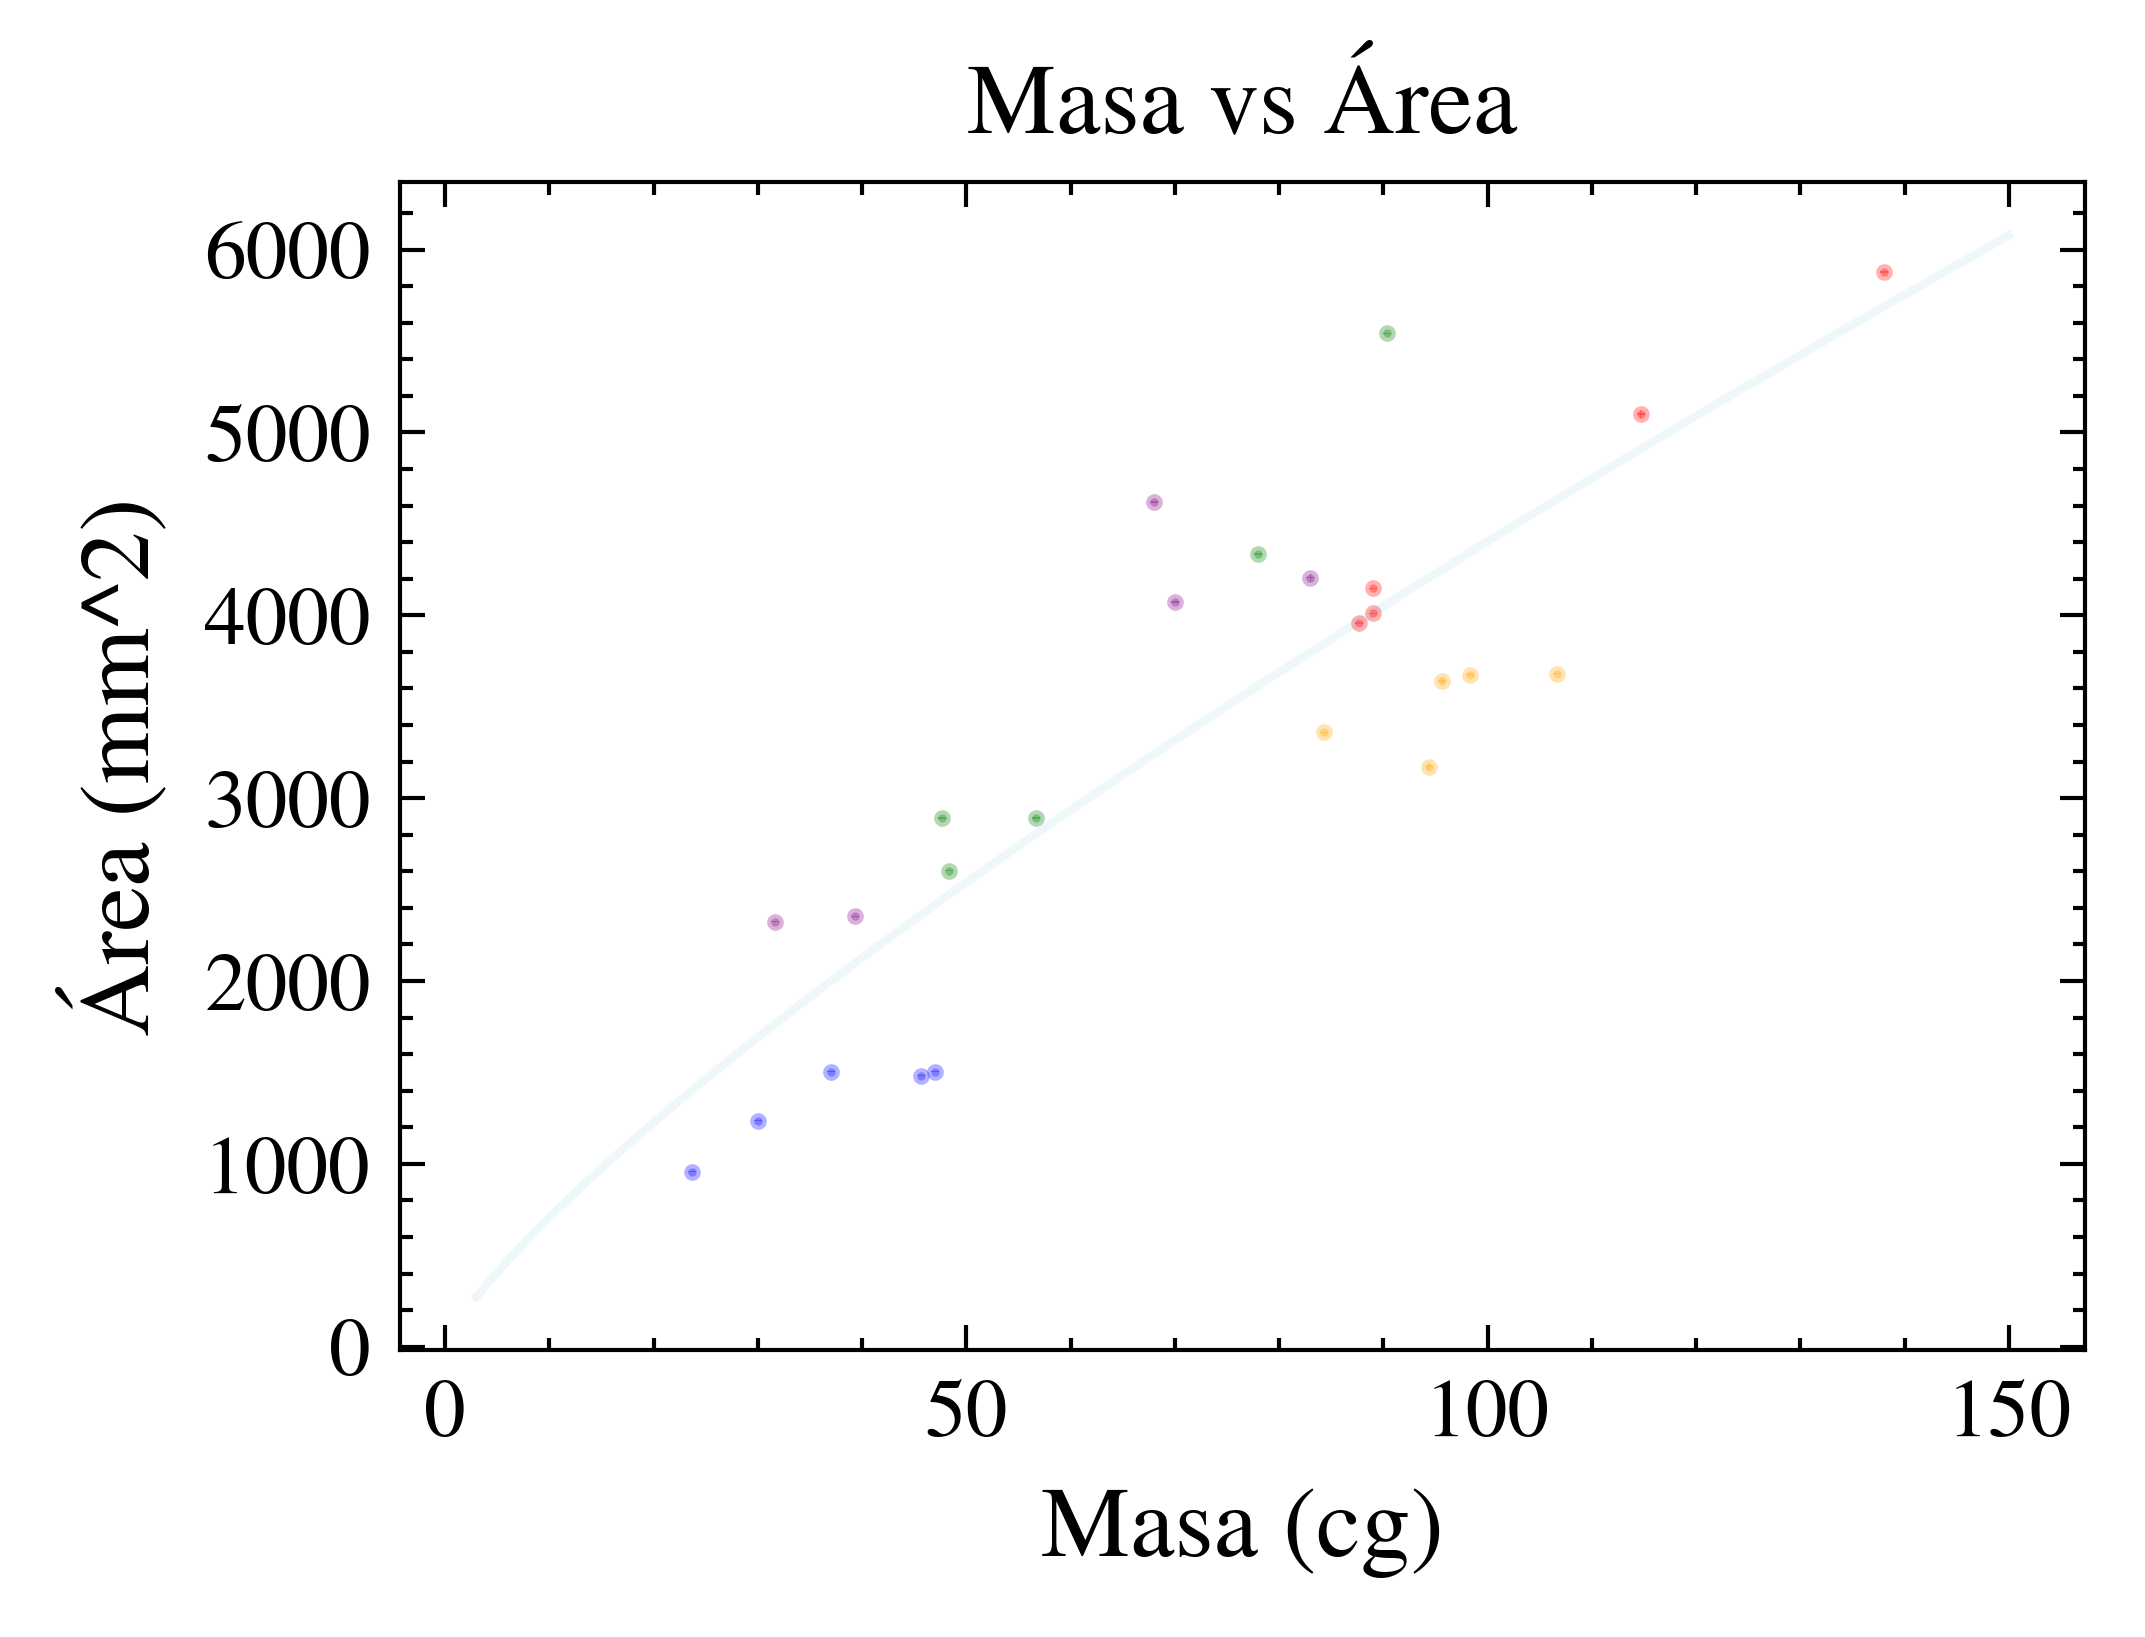

In [74]:
def linear(x, a, b):
    return a * x + b

def powerlaw(x, a, b):
    return a * x**b

tol = 0.5
# areaError = [((1/4 * b0 * np.pi)**2 * tol +  (1/4 * a0 * np.pi)**2 * tol)**0.5 for a0, b0 in zip(df['width'], df['length'])]
# print(areaError)
#plot the area vs weight with linear regression after log the data
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    # areaError = 0
    areaError = [((1/4 * b0 * np.pi)**2 * tol +  (1/4 * a0 * np.pi)**2 * tol)**0.5 for a0, b0 in zip(np.log(clase[0]['width']), np.log(clase[0]['length']))]
    plt.errorbar(np.log(clase[0]['weight'] * 100), np.log(clase[0]['area']), xerr=0.2, fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=0.3, yerr=areaError)
combined_weights = np.concatenate([clase[0]['weight'] * 100 for clase in clases])
combined_areas = np.concatenate([clase[0]['area'] for clase in clases])
xfit = np.linspace(3, 5, 100)
popt, pcov = curve_fit(linear, np.log(combined_weights), np.log(combined_areas))
plt.plot(xfit, linear(xfit, *popt), label=f'f(x)= {popt[0]:.2f}x + {popt[1]:.2f}', alpha=0.2, color='black')

plt.xlabel('Masa (cg)')
plt.ylabel('Área (mm^2)')
plt.title('Masa vs Área')
# plt.legend(fontsize=7)
plt.savefig('MvsAlogR.pdf', format='pdf')
plt.show()  
print (areaError)
#power law regression without log
for clase in clases:
    massError = (sistematicWeightError**2 + sigmaWeightMeanError**2)**0.5
    areaError = [((1/4 * b0 * np.pi)**2 * tol +  (1/4 * a0 * np.pi)**2 * tol)**0.5 for a0, b0 in zip(clase[0]['width'], clase[0]['length'])]
    print(areaError)
    plt.errorbar(clase[0]['weight']*100, clase[0]['area'], xerr=np.log(massError), yerr=np.log(areaError), fmt='o', label=clase[1], ms=diameter_points, color=clase[2], alpha=0.3)
combined_weights = np.concatenate([clase[0]['weight'] * 100 for clase in clases])
combined_areas = np.concatenate([clase[0]['area'] for clase in clases])
xfit = np.linspace(3, 150, 100)
popt, pcov = curve_fit(powerlaw, combined_weights, combined_areas)
plt.plot(xfit, powerlaw(xfit, *popt), label=f'f(x)= {popt[0]:.2f}x^{popt[1]:.2f}', alpha=0.2, color='lightblue')

plt.xlabel('Masa (cg)')
plt.ylabel('Área (mm^2)')
plt.title('Masa vs Área')
# plt.legend(fontsize=7)
plt.savefig('MvsAlogR.pdf', format='pdf')
plt.show()

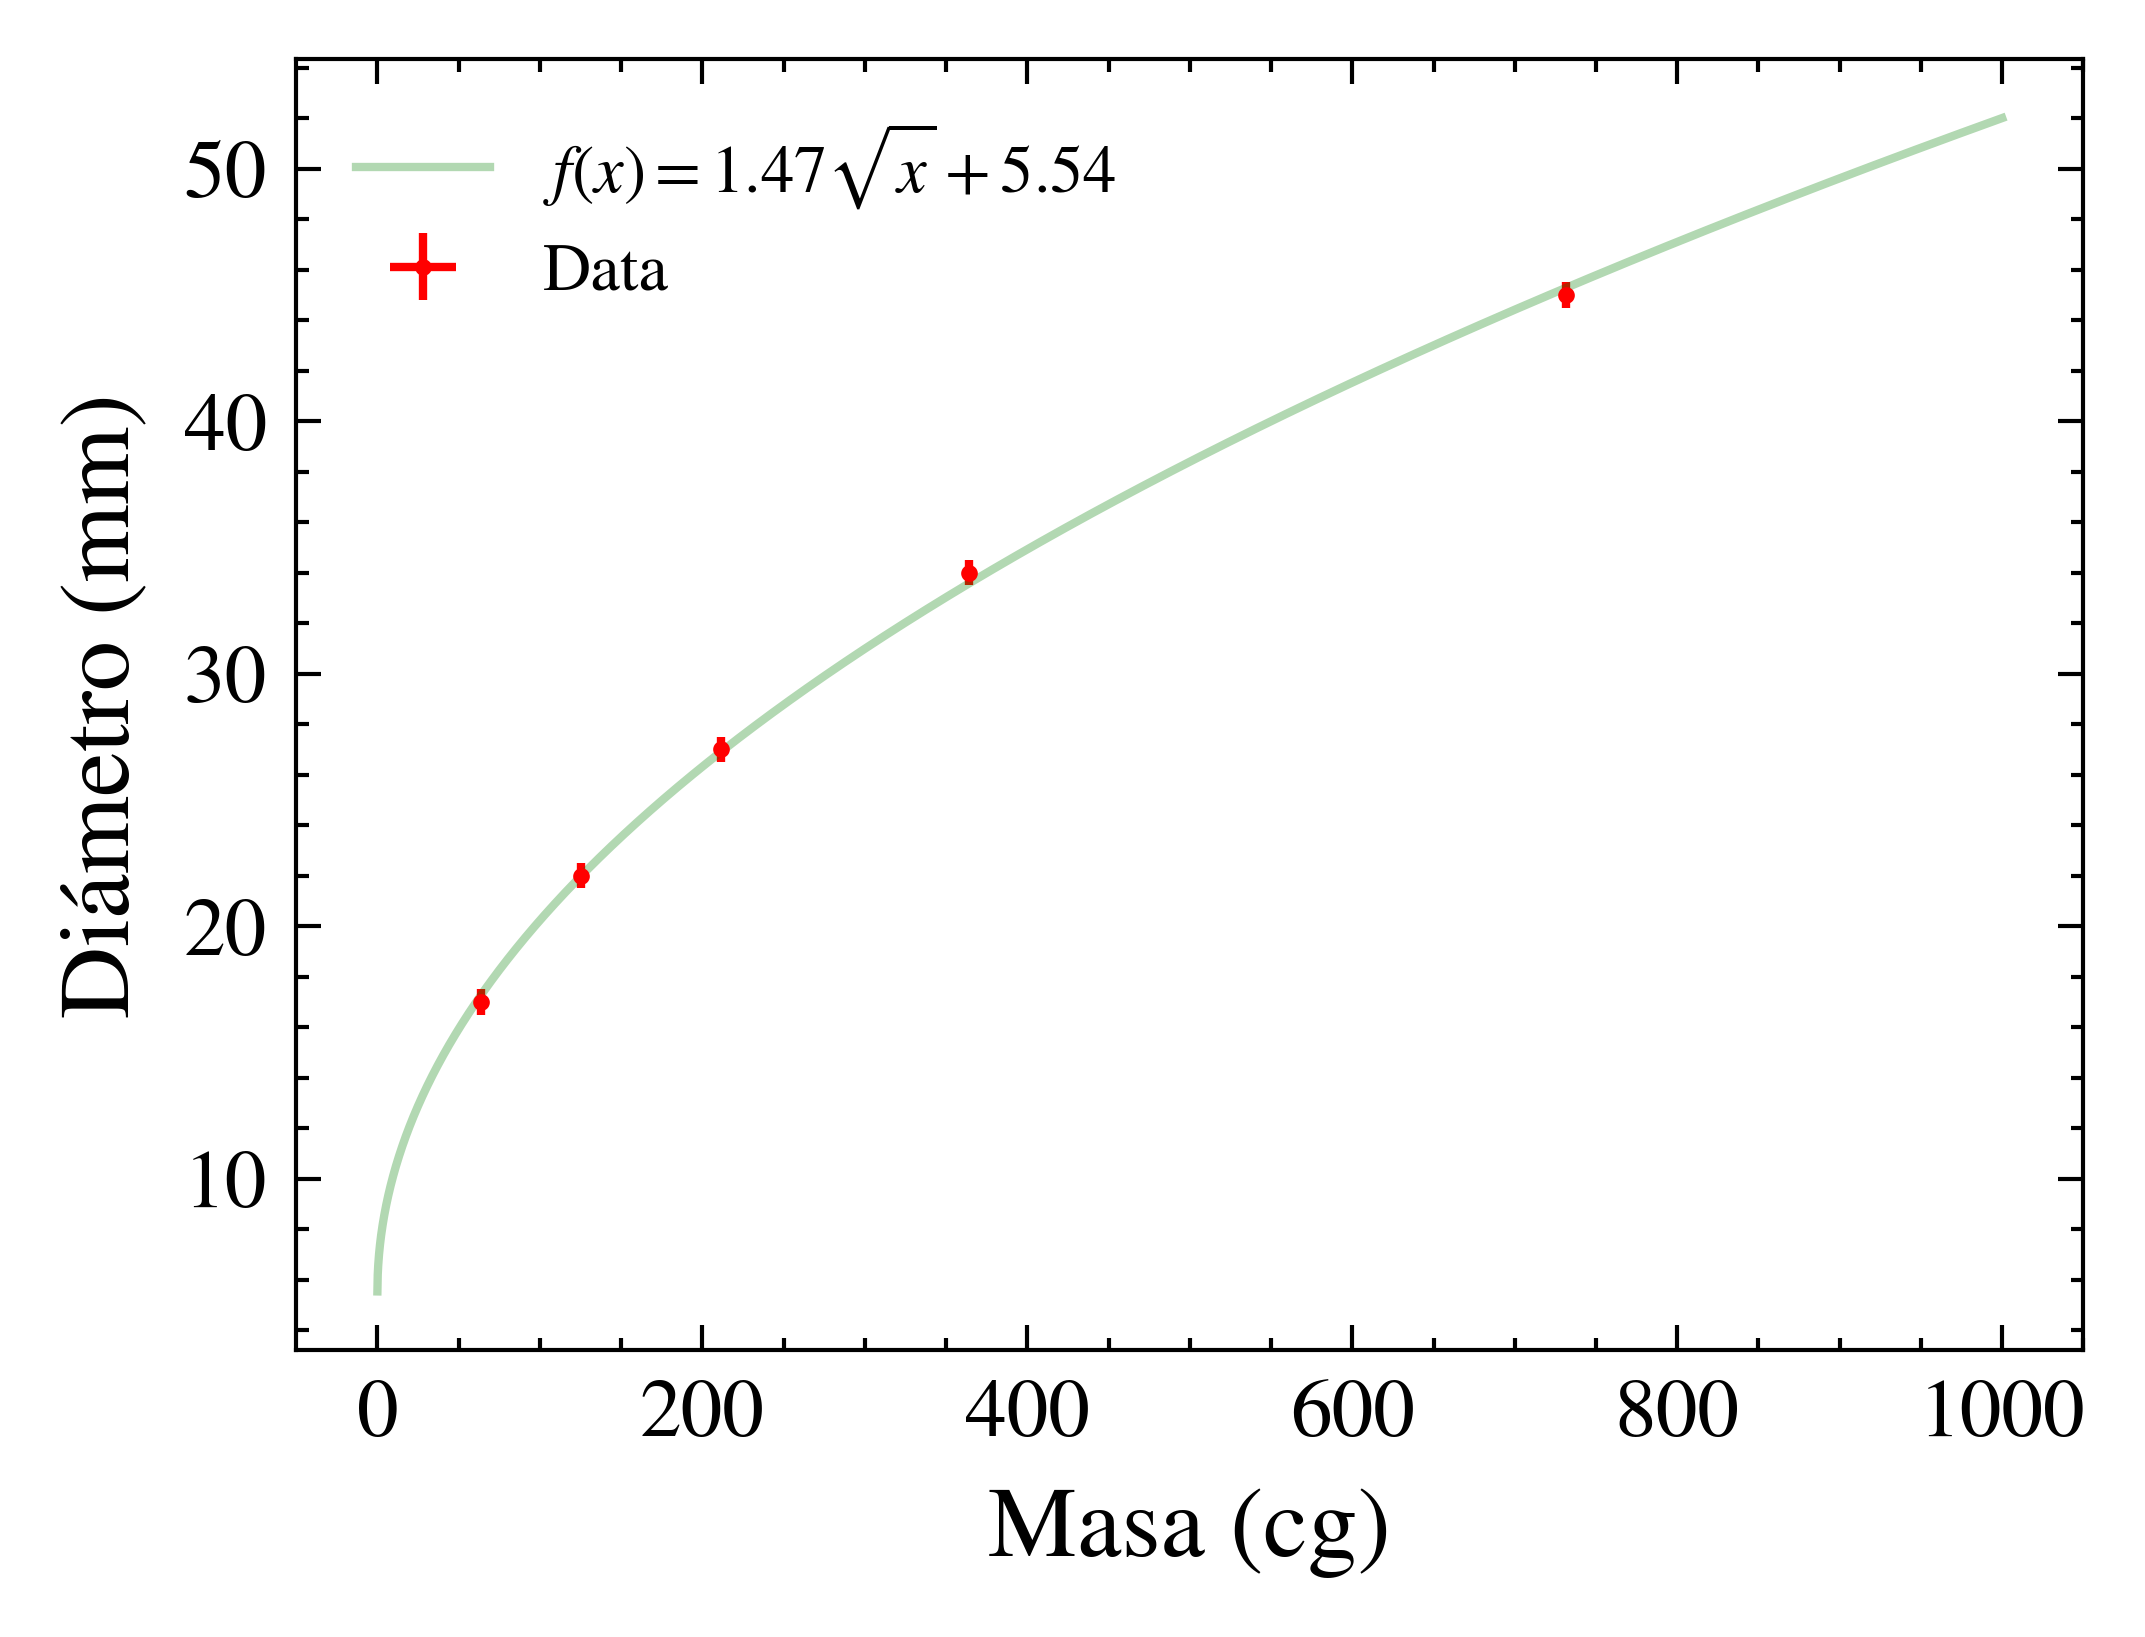

In [7]:
#regresion raiz cuadrada

def square(x, a, b):
    return a*x**0.5 + b

def linear(x, a, b):
    return a*x + b

def cuadratic(x, a, b, c):
    return a*x**2 + b*x + c

balls = pd.read_csv('balls.csv')

# Linear regression of the diameter with respect to the mass
plt.errorbar(balls['mass']*100, balls['diameter'], xerr=massError, yerr=0.5, fmt='o', label='Data', ms=diameter_points, color='red')
xfit = np.linspace(0, 1000, 10000)
# poptl, pcovl = curve_fit(linear, balls['mass']*100, balls['diameter'])
# # plt.plot(xfit, linear(xfit, *poptl), label='Linear Regression', color='blue', alpha=0.3)
popt, pcov = curve_fit(square, balls['mass']*100, balls['diameter'])
plt.plot(xfit, square(xfit, *popt), label=f'$f(x)={round(popt[0], 2)} \sqrt{{x}}+ {round(popt[1], 2)}$', color='green', alpha=0.3)
# poptc, pcovc = curve_fit(cuadratic, balls['mass']*100, balls['diameter'])
# plt.plot(xfit, cuadratic(xfit, *poptc), label='Regresión cuadrática'+f'\n$f(x)={round(poptc[0], 2)} x^2+ {round(poptc[1], 2)}x + {round(poptc[2], 2)}$', color='purple', alpha=0.3)
# pope, ppcove = curve_fit(exponential, balls['mass']*100, balls['diameter'])
plt.xlabel('Masa (cg)')
plt.ylabel('Diámetro (mm)')
plt.legend(fontsize=8)
plt.savefig('MvsDsqrt.pdf', format='pdf')
plt.show()

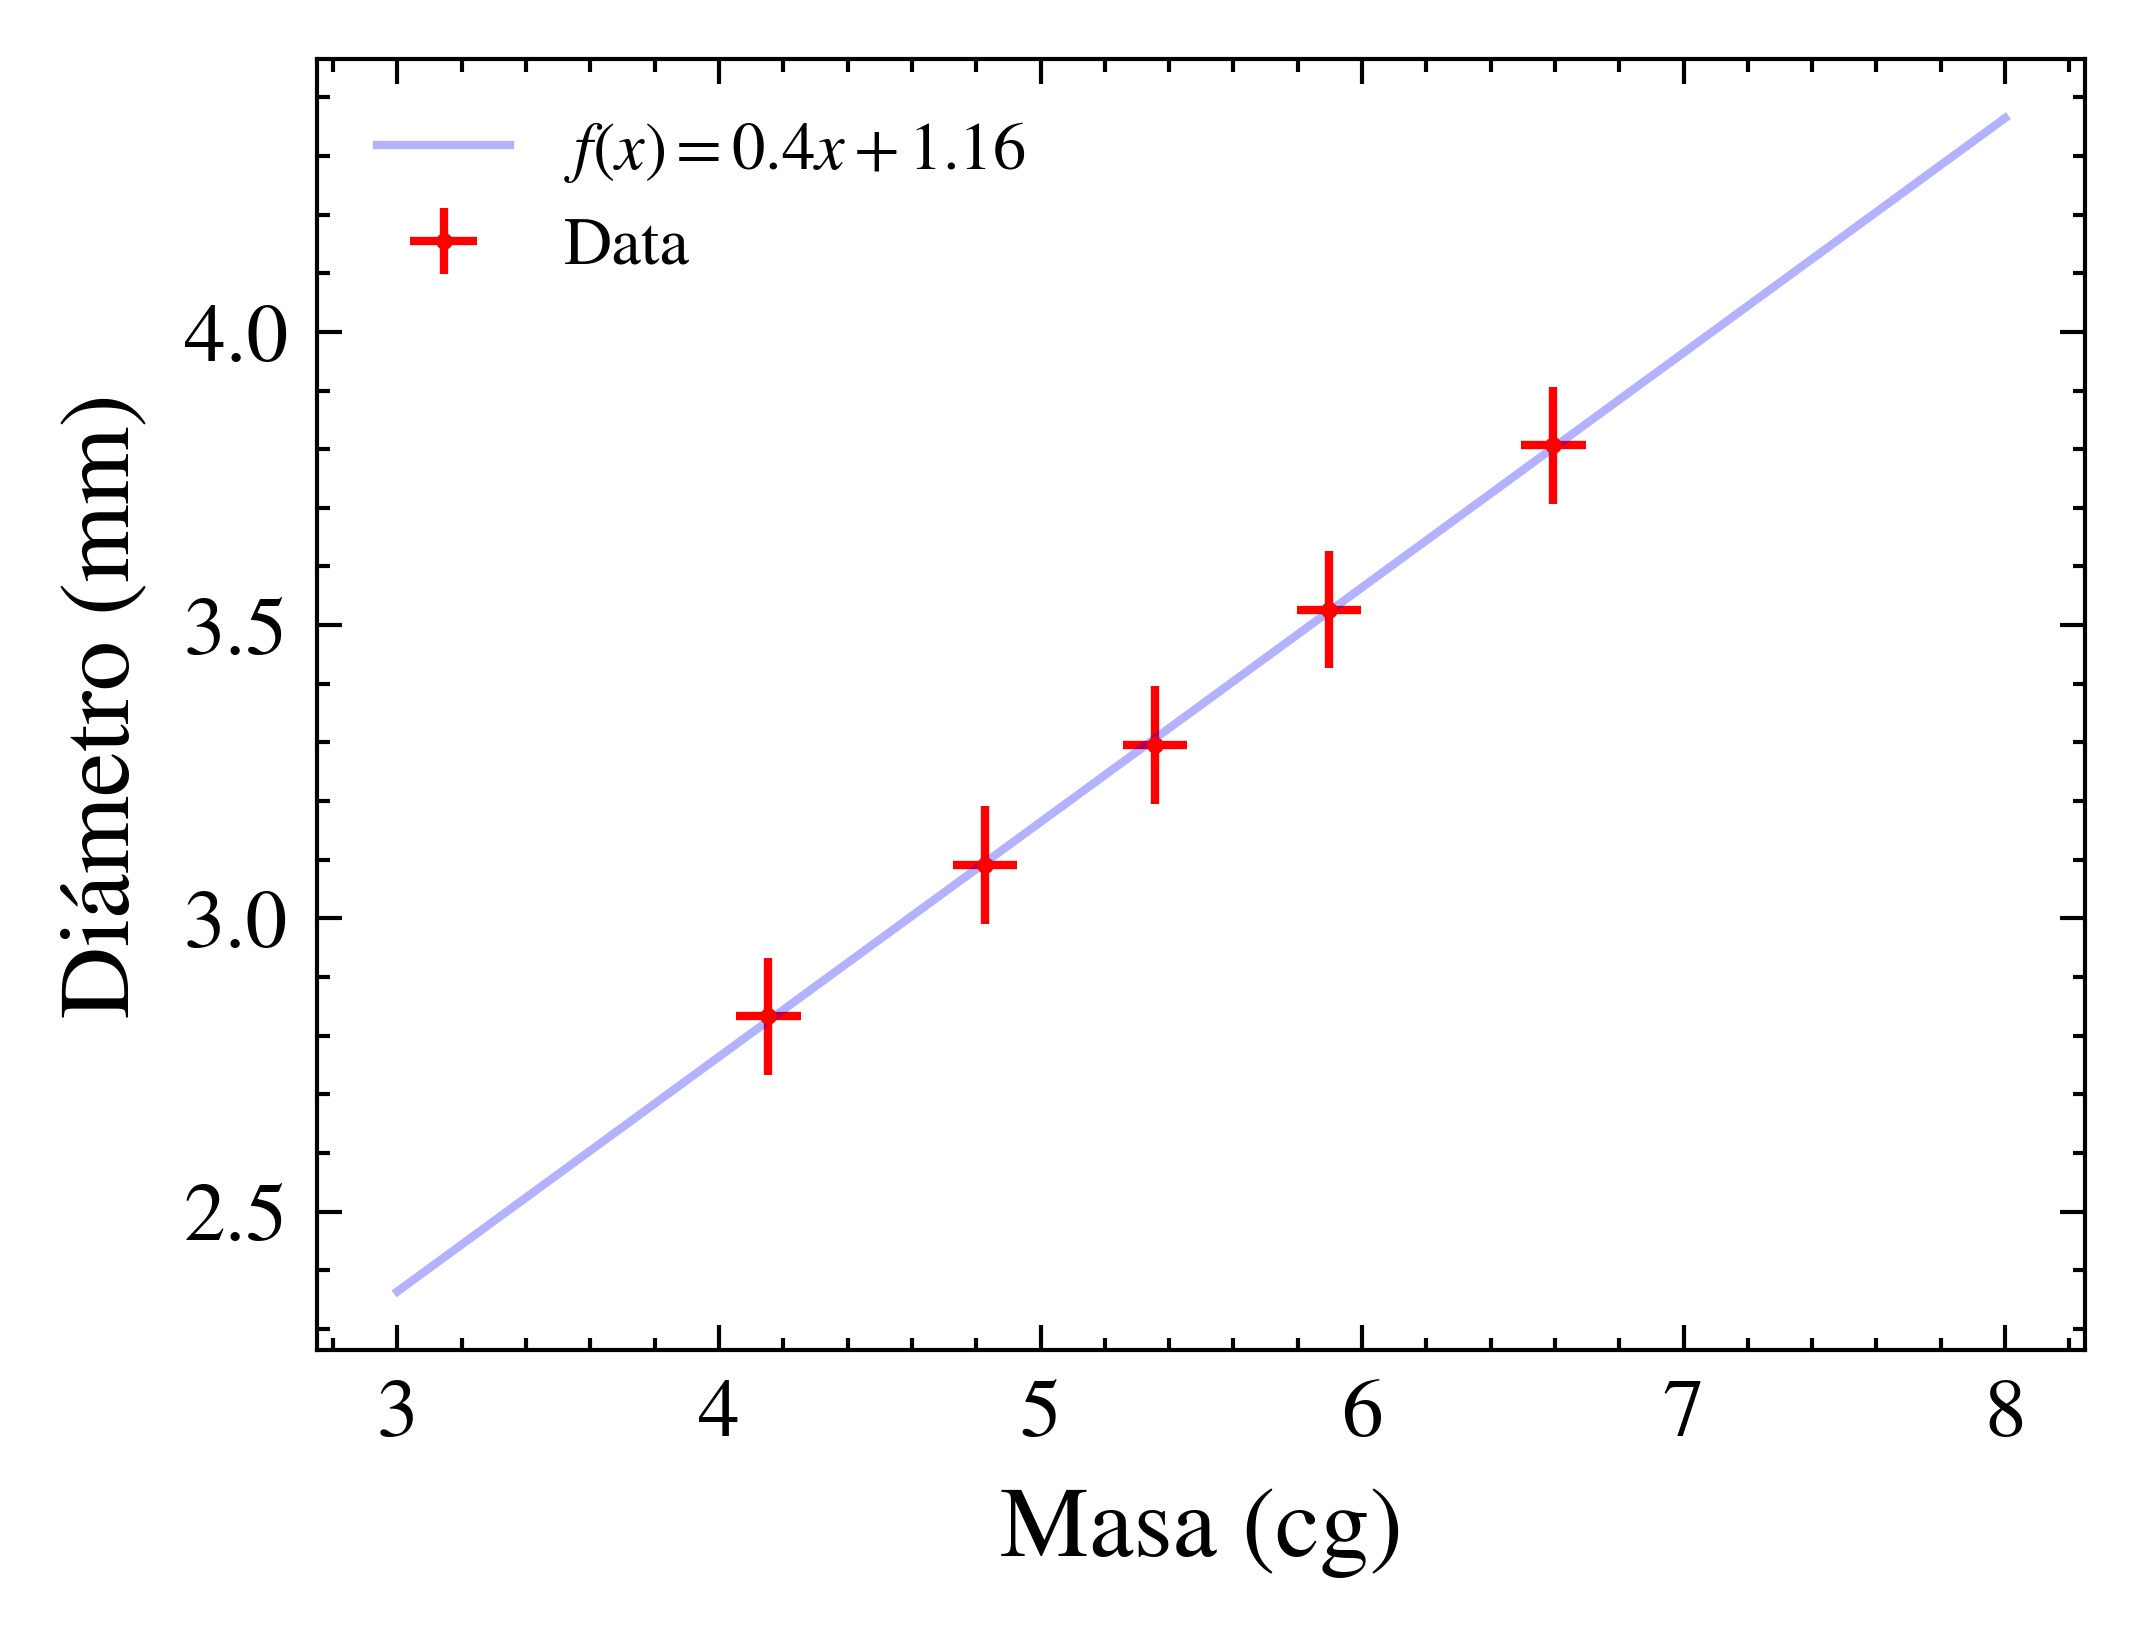

In [8]:
#hacemos lo mismo pero con el log de los datos
logmass = np.log(balls['mass']*100)
logdiameter = np.log(balls['diameter'])
logdiam = 0.1
plt.errorbar(logmass, logdiameter, xerr=0.1, yerr=logdiam, fmt='o', label='Data', ms=diameter_points, color='red')
xfit = np.linspace(3, 8, 10)
poptl, pcovl = curve_fit(linear, logmass, logdiameter)
plt.plot(xfit, linear(xfit, *poptl), label=f'$f(x)={round(poptl[0], 2)}x + {round(poptl[1], 2)}$', color='blue', alpha=0.3)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('Masa (cg)')
plt.ylabel('Diámetro (mm)')
#ajustar las divisiones de ambos ejes

#save the figure in format pdf
plt.legend(fontsize=8)
plt.savefig('MvsDloglog.pdf', format='pdf')
plt.show()






